# Исследование данных интернет-магазина «Стримчик»

## Описание проекта

Вы работаете в интернет-магазине «Стримчик», который продаёт по всему миру компьютерные игры. Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation). Вам нужно выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.

Перед вами данные до 2016 года. Представим, что сейчас декабрь 2016 г., и вы планируете кампанию на 2017-й. Нужно отработать принцип работы с данными. Неважно, прогнозируете ли вы продажи на 2017 год по данным 2016-го или же 2027-й — по данным 2026 года.

В наборе данных попадается аббревиатура ESRB (Entertainment Software Rating Board) — это ассоциация, определяющая возрастной рейтинг компьютерных игр. ESRB оценивает игровой контент и присваивает ему подходящую возрастную категорию, например, «Для взрослых», «Для детей младшего возраста» или «Для подростков».

### Инструкция по выполнению проекта

**Шаг 1. Откройте файл с данными и изучите общую информацию**

Файл: games.csv.

**Шаг 2. Подготовьте данные**

- Замените названия столбцов (приведите к нижнему регистру);
- Преобразуйте данные в нужные типы. Опишите, в каких столбцах заменили тип данных и почему;
- Обработайте пропуски при необходимости:
    - Объясните, почему заполнили пропуски определённым образом или почему не стали это делать;
    - Опишите причины, которые могли привести к пропускам;
    - Обратите внимание на аббревиатуру 'tbd' в столбце с оценкой пользователей. Отдельно разберите это значение и опишите, как его обработать;
- Посчитайте суммарные продажи во всех регионах и запишите их в отдельный столбец.

**Шаг 3. Проведите исследовательский анализ данных**

- Посмотрите, сколько игр выпускалось в разные годы. Важны ли данные за все периоды?
- Посмотрите, как менялись продажи по платформам. Выберите платформы с наибольшими суммарными продажами и постройте распределение по годам. За какой характерный срок появляются новые и исчезают старые платформы?
- Возьмите данные за соответствующий **актуальный период**. Актуальный период определите самостоятельно в результате исследования предыдущих вопросов. Основной фактор — эти данные помогут построить прогноз на 2017 год.
- Не учитывайте в работе данные за **предыдущие годы**.
- Какие платформы лидируют по продажам, растут или падают? Выберите несколько потенциально прибыльных платформ.
- Постройте график «ящик с усами» по глобальным продажам игр в разбивке по платформам. Опишите результат.
- Посмотрите, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков. Постройте диаграмму рассеяния и посчитайте корреляцию между отзывами и продажами. Сформулируйте выводы.
- Соотнесите выводы с продажами игр на других платформах.
- Посмотрите на общее распределение игр по жанрам. Что можно сказать о самых прибыльных жанрах? Выделяются ли жанры с высокими и низкими продажами?

**Шаг 4. Составьте портрет пользователя каждого региона**

Определите для пользователя каждого региона (*NA*, *EU*, *JP*):
- Самые популярные платформы (топ-5). Опишите различия в долях продаж.
- Самые популярные жанры (топ-5). Поясните разницу.
- Влияет ли рейтинг ESRB на продажи в отдельном регионе?

**Шаг 5. Проверьте гипотезы**

- Средние пользовательские рейтинги платформ *Xbox One* и *PC* одинаковые;
- Средние пользовательские рейтинги жанров *Action* (англ. «действие», экшен-игры) и *Sports* (англ. «спортивные соревнования») разные.

Задайте самостоятельно пороговое значение *alpha*.

Поясните:

- Как вы сформулировали нулевую и альтернативную гипотезы;
- Какой критерий применили для проверки гипотез и почему.

**Шаг 6. Напишите общий вывод**

**Оформление**: Выполните задание в *Jupyter Notebook*. Заполните программный код в ячейках типа *code*, текстовые пояснения — в ячейках типа *markdown*. Примените форматирование и заголовки.

### Описание данных

- `Name` — название игры
- `Platform` — платформа
- `Year_of_Release` — год выпуска
- `Genre` — жанр игры
- `NA_sales` — продажи в Северной Америке (миллионы проданных копий)
- `EU_sales` — продажи в Европе (миллионы проданных копий)
- `JP_sales` — продажи в Японии (миллионы проданных копий)
- `Other_sales` — продажи в других странах (миллионы проданных копий)
- `Critic_Score` — оценка критиков (максимум 100)
- `User_Score` — оценка пользователей (максимум 10)
- `Rating` — рейтинг от организации *ESRB* (англ. *Entertainment Software Rating Board*). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.

Данные за 2016 год могут быть неполными.

## Загрузка данных

Импортируем необходимые библиотеки, cчитаем CSV-файл с данными и сохраним его в датафрейм. Изучим общую информацию о датафрейме.

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats as st

In [11]:
%config InlineBackend.figure_format = 'retina'

In [12]:
games_df = pd.read_csv('datasets/games.csv')

In [13]:
games_df.head()

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


In [14]:
games_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


**Всего в датафрейме с играми 16715 записей.** Есть пропуски.

## Предобработка данных

### Названия столбцов

Заменим названия столбцов (примедем к нижнему регистру).

In [19]:
games_df.columns = games_df.columns.str.lower()

### Явные дубликаты

Проверим явные дубликаты.

In [22]:
games_df.duplicated().sum()

0

Явных дубликатов в датафрейме нет.

### Название игры

Проверим пропуски в столбце с названием игры.

In [26]:
games_df['name'].isna().sum()

2

Пропусков в столбце с названием игры немного — удалим записи с пропущенными значениями.

In [28]:
games_df = games_df.dropna(subset=['name'])

Уберем пробелы из начала и конца строки с названием игры.

In [30]:
games_df['name'] = games_df['name'].str.strip()

Проверим записи-дубликаты по набору столбцов: `name`, `platform`, `year_of_release`.

In [32]:
games_df.duplicated(subset=['name', 'platform', 'year_of_release']).sum()

1

Дубликатов немного, удалим их.

In [34]:
games_df = games_df.drop_duplicates(subset=['name', 'platform', 'year_of_release'])

### Год выпуска

Проверим пропуски в столбце с годом выпуска.

In [37]:
games_df['year_of_release'].isna().sum()

269

Пропусков в столбце с годом выпуска игры немного (~1.6%) — удалим записи с пропущенными значениями.

In [39]:
games_df = games_df.dropna(subset=['year_of_release'])

Приведем столбец с годом выпуска к целочисленному типу.

In [41]:
games_df['year_of_release'] = games_df['year_of_release'].astype('int')

### Оценки критиков и пользователей

Посмотрим на описание данных в столбце с оценкой пользователей.

In [44]:
games_df['user_score'].describe()

count     9838
unique      96
top        tbd
freq      2376
Name: user_score, dtype: object

В столбце с оценкой пользователей помимо числовых данных есть строковые: 'tbd' (To Be Determined). Поскольку данная аббревиатура означает, что оценка не определена, заменим аббревиатуру на NaN.

In [46]:
games_df.loc[games_df['user_score'] == 'tbd', 'user_score'] = np.nan

Приведем столбец с оценкой пользователей к типу с плавающей запятой.

In [48]:
games_df['user_score'] = games_df['user_score'].astype('float64')

Проверим пропуски в столбцах с оценками критиков и пользователей.

In [50]:
(f'Количество пропусков в столбце с оценкой критиков: {games_df["critic_score"].isna().sum()}',
 f'Количество пропусков в столбце с оценкой пользователей: {games_df["user_score"].isna().sum()}')

('Количество пропусков в столбце с оценкой критиков: 8461',
 'Количество пропусков в столбце с оценкой пользователей: 8981')

К причинам пропусков в столбцах с оценками критиков и пользователей можно отнести:
- Малоизвестные и не самые популярные игры не имеют достаточного количества пользовательских оценок и оценок критиков для формирования суммарных оценок.
- Данные собраны из открытых источников — для каких-то игр просто не удалось найти оценки.

### Рейтинг

Проверим пропуски в столбце с рейтингом.

In [54]:
games_df['rating'].isna().sum()

6676

Пропусков в столбце с рейтингом ESRB достаточно много (~41%). Рейтинг ESRB не является обязательным, поэтому не все игры его получают. Значить, закроем пропуски в столбце заглушками `WR` (without rating).

In [56]:
games_df['rating'] = games_df['rating'].fillna('WR')

К причинам пропусков в столбце с рейтингом можно отнести:
- Получение рейтинг ESRB не является обязательным, поэтому не все игры его получают.
- Данные собраны из открытых источников — для каких-то игр просто не удалось найти рейтинг ESRB.

### Суммарные продажи во всех регионах

Посчитаем суммарные продажи во всех регионах и запишем их в отдельный столбец.

In [60]:
games_df.insert(
    games_df.columns.get_loc('other_sales') + 1, 'total_sales', 
    games_df[['na_sales', 'eu_sales', 'jp_sales', 'other_sales']].sum(axis=1)
)

### Результаты

In [62]:
games_df.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,total_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,82.54,76.0,8.0,E
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,40.24,NaN,NaN,WR
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,35.52,82.0,8.3,E
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,32.77,80.0,8.0,E
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,31.38,NaN,NaN,WR


In [63]:
games_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16443 entries, 0 to 16714
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16443 non-null  object 
 1   platform         16443 non-null  object 
 2   year_of_release  16443 non-null  int32  
 3   genre            16443 non-null  object 
 4   na_sales         16443 non-null  float64
 5   eu_sales         16443 non-null  float64
 6   jp_sales         16443 non-null  float64
 7   other_sales      16443 non-null  float64
 8   total_sales      16443 non-null  float64
 9   critic_score     7982 non-null   float64
 10  user_score       7462 non-null   float64
 11  rating           16443 non-null  object 
dtypes: float64(7), int32(1), object(4)
memory usage: 1.6+ MB


В результате предобработки были обработаны пропуски в данных, несколько записей было удалено. 

**Всего в датафрейме с играми осталось 16443 записей. Остались пропуски в столбцах с оценками критиков и пользователей (~51% и ~55% от общего числа записей соответственно)** — корректно восстановить эти пропуски на основе имеющихся данных не представляется возможным.

## Анализ данных

### Распределение игр по годам

Посмотрим, сколько игр выпускалось в разные годы. Определим, важны ли данные за все периоды.

In [68]:
games_df['year_of_release'].describe()

count    16443.000000
mean      2006.485921
std          5.875546
min       1980.000000
25%       2003.000000
50%       2007.000000
75%       2010.000000
max       2016.000000
Name: year_of_release, dtype: float64

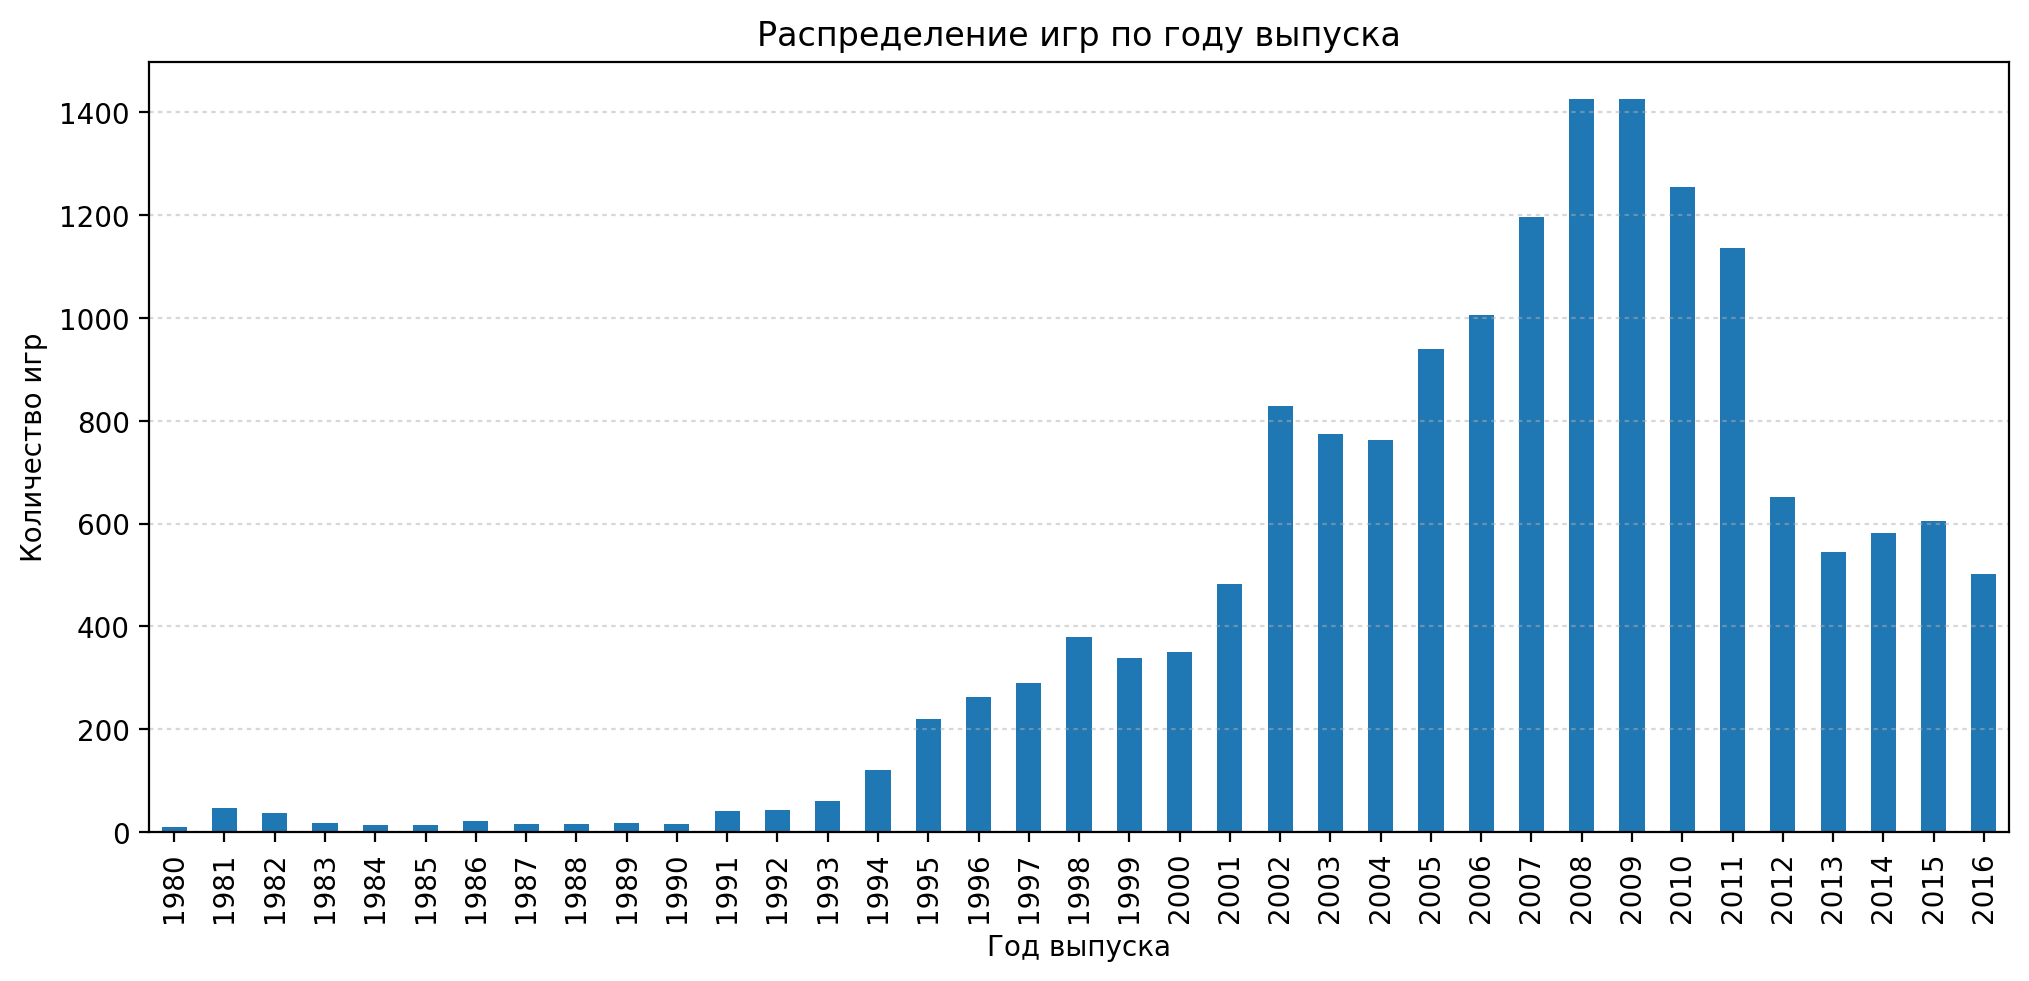

In [69]:
ax = games_df.pivot_table(index='year_of_release', values='name', aggfunc='count') \
             .plot(kind='bar', figsize=(12, 5), legend='')
ax.set_title('Распределение игр по году выпуска')
ax.set_xlabel('Год выпуска')
ax.set_ylabel('Количество игр')
ax.grid(axis='y', alpha=0.5, dashes=(2, 2))
pass

**Мы располагаем данными о компьютерных играх с 1980 по 2016 годы. На гисторгамме пусть и слабо, но заметны результаты кризиса индустрии компьютерных игр 1983 года («Atari-шок»). Затем хорошо прослеживается рост выпуска игр с начала 1990-х. А с 2010 года наблюдаем последствия мирового финансового кризиса 2008 года — безработным людям становится не до развлечений, поэтому количество выпускаемых компьютерных игр падает.** На дальнейшее падение количества выпускаемых игр также оказало влияние трансформация индустрии компьютерных игр — во время кризиса множество небольших игровых студий либо обанкротилось, либо было поглащено крупными компаниями, в которых акцент делается на качестве проектов, а не на их количестве.

На первый вгляд можно предположить, что для дальнейшего анализа вряд ли пригодятся данные «докризисного» периода, **стоит рассматривать 2010 год и далее.**

### Распределение продаж игр по платформам и годам

Посмотрим, как менялись продажи по платформам. Выберем платформы с наибольшими суммарными продажами и построим распределение по годам. Попытаемся понять, за какой характерный срок появляются новые и исчезают старые платформы.

Посмотрим на суммарные продажи игр на разных платформах.

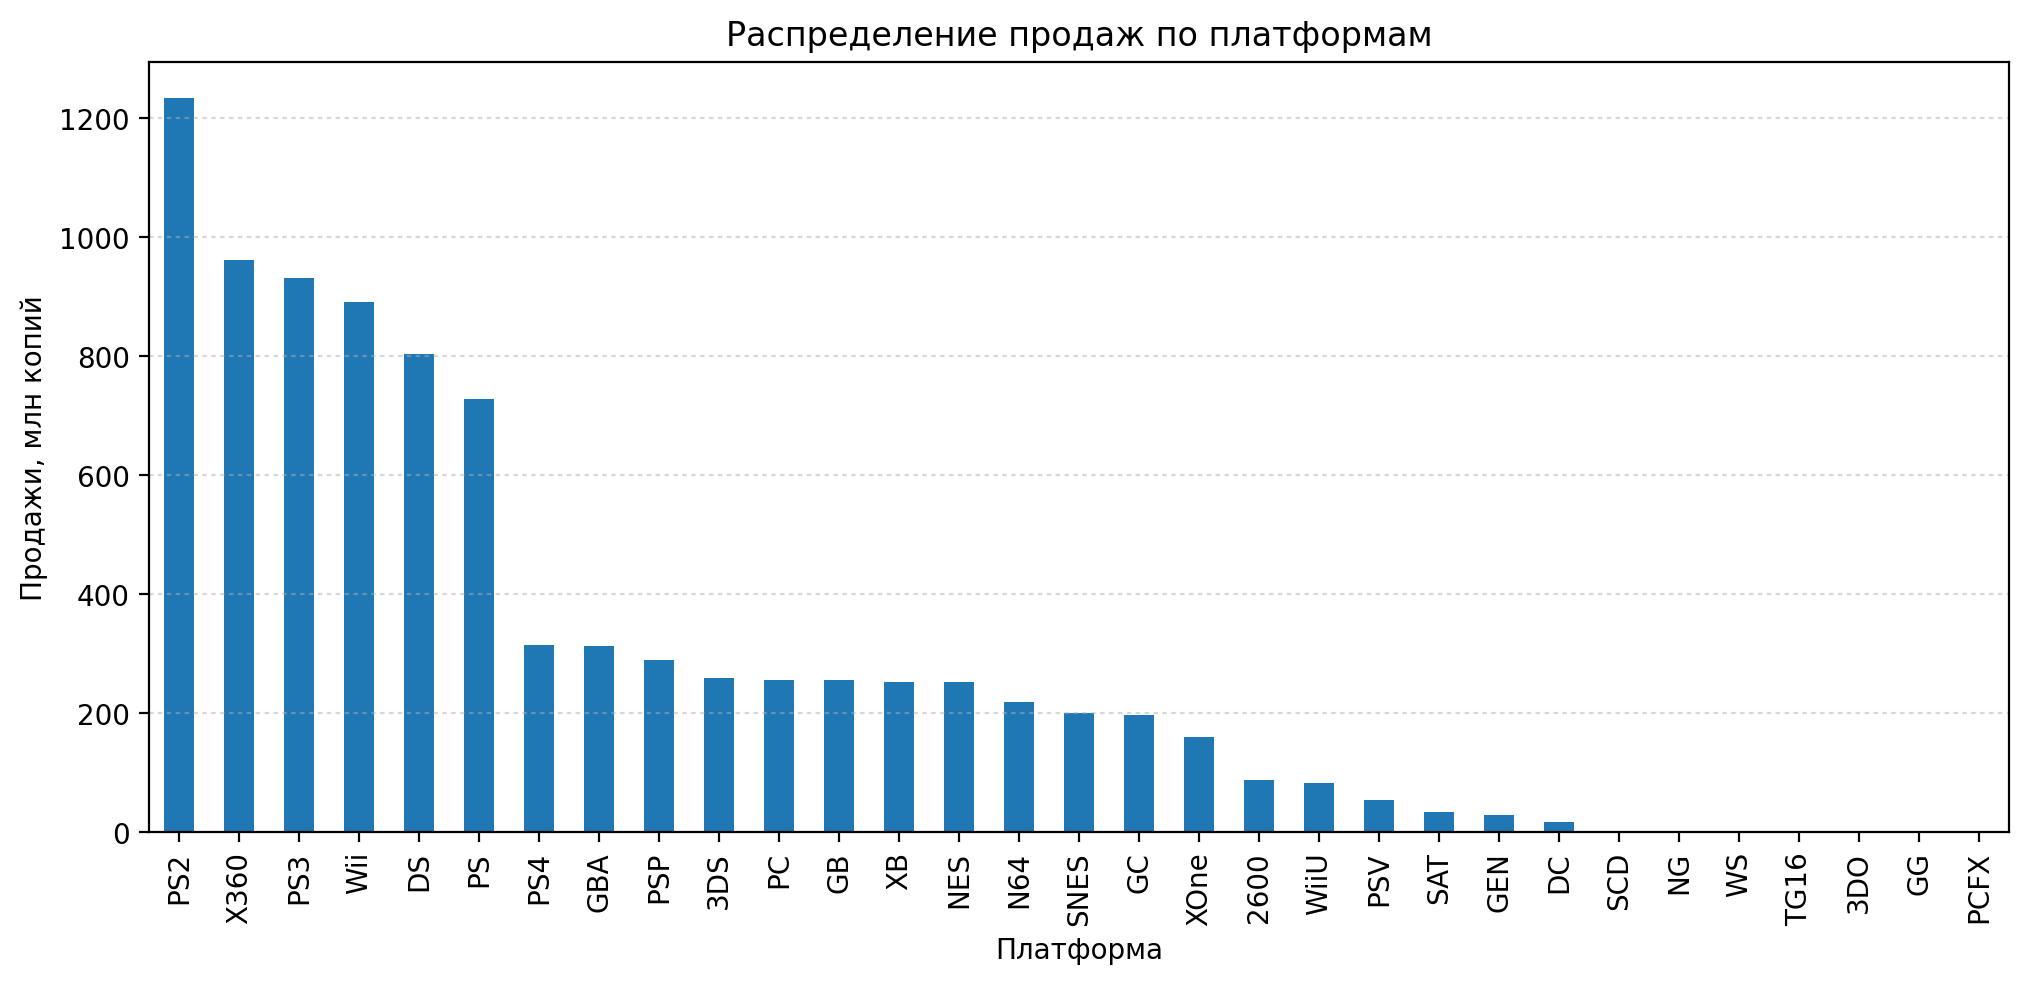

In [74]:
sales_by_platform = (games_df
                    .pivot_table(index='platform', values='total_sales', aggfunc='sum')
                    .sort_values(by='total_sales', ascending=False))

ax = sales_by_platform.plot(kind='bar', figsize=(12, 5), legend='')
ax.set_title('Распределение продаж по платформам')
ax.set_xlabel('Платформа')
ax.set_ylabel('Продажи, млн копий')
ax.grid(axis='y', alpha=0.5, dashes=(2, 2))
pass

In [75]:
top20_platforms = sales_by_platform[:20].index.values
f'Топ-20 платформ: {", ".join(top20_platforms)}'

'Топ-20 платформ: PS2, X360, PS3, Wii, DS, PS, PS4, GBA, PSP, 3DS, PC, GB, XB, NES, N64, SNES, GC, XOne, 2600, WiiU'

**По суммарным продажам за весь период в датасете лидирует PlayStation 2, также в тройке лидиров Xbox 360 и PlayStation 3.**

Посмотрим распределение продаж по годам на топ-20 платформах.

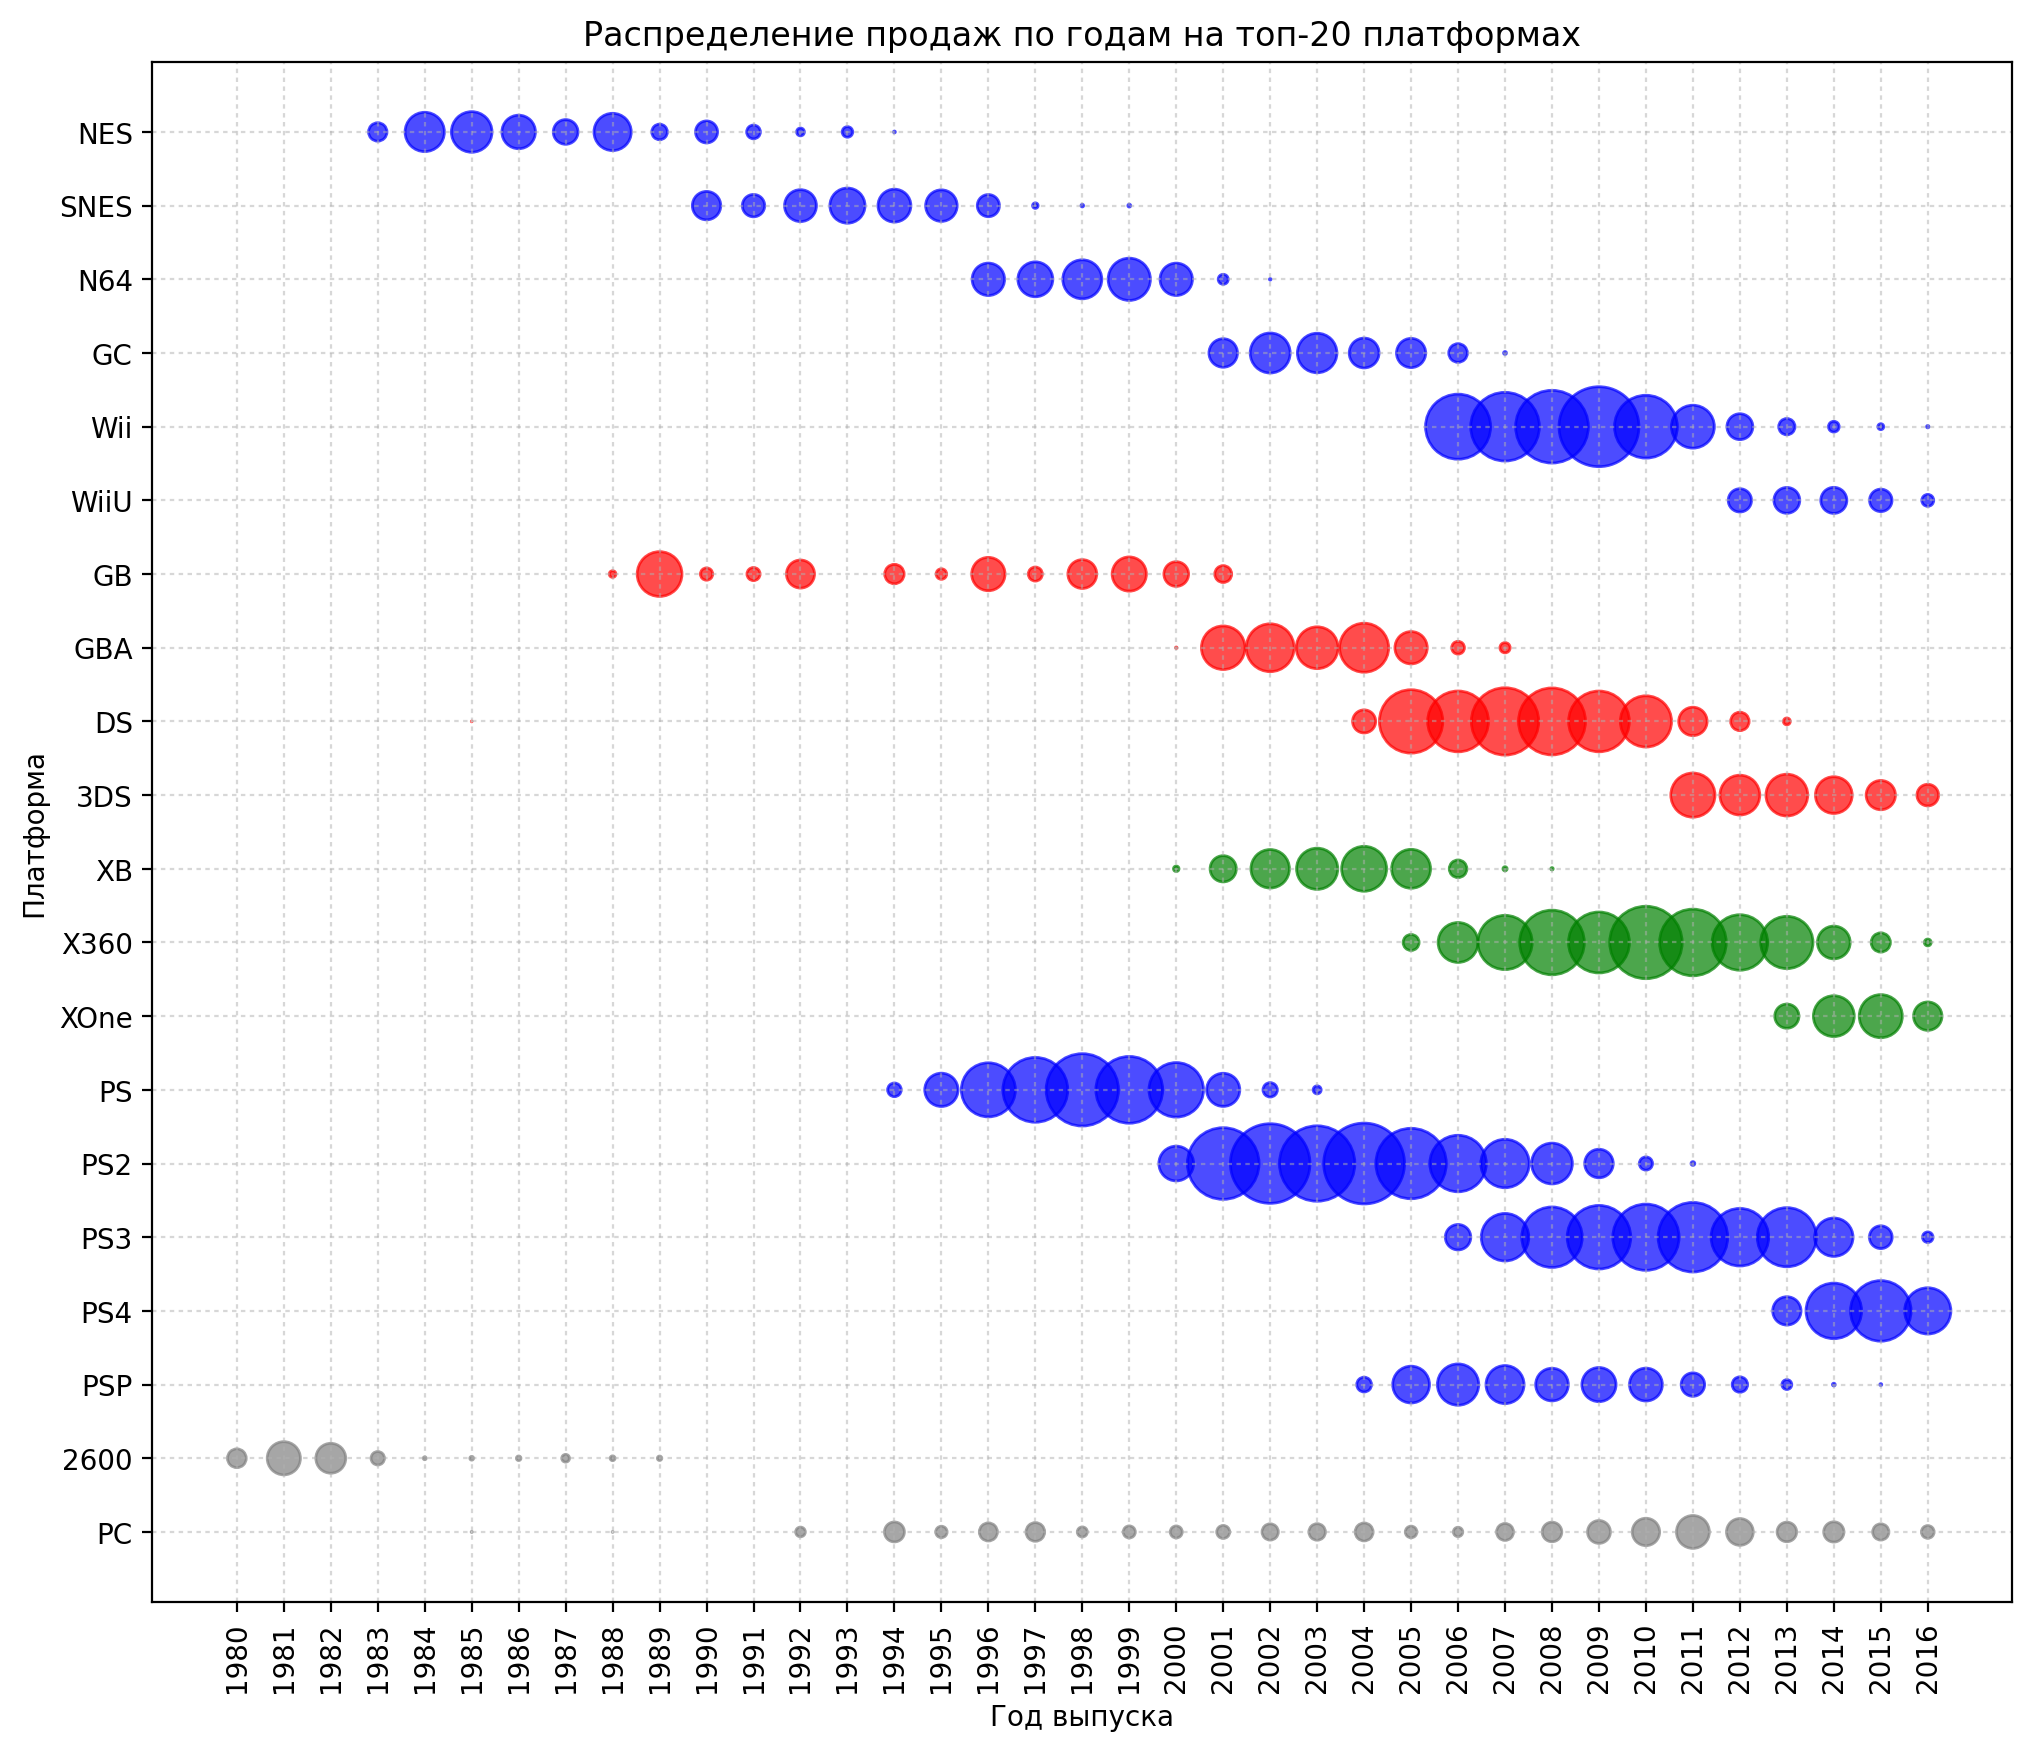

In [78]:
sotred_top20_platforms = ['PC', '2600',
                          'PSP', 'PS4', 'PS3', 'PS2', 'PS', 
                          'XOne', 'X360', 'XB', 
                          '3DS', 'DS', 'GBA', 'GB', 
                          'WiiU', 'Wii', 'GC', 'N64', 'SNES', 'NES']
colors = ['gray', 'gray',
          'blue', 'blue', 'blue', 'blue', 'blue',
          'green', 'green', 'green',
          'red', 'red', 'red', 'red',
          'blue', 'blue', 'blue', 'blue', 'blue', 'blue']
grouped_games = (games_df
                 .query('platform in @sotred_top20_platforms')
                 .groupby(['platform', 'year_of_release'])['total_sales']
                 .agg('sum'))

fig, ax = plt.subplots(figsize=(12, 10))
ax.scatter(x=[ind[1] for ind in grouped_games.index],
           y=[sotred_top20_platforms.index(ind[0]) for ind in grouped_games.index],
           s=[value * 4 for value in grouped_games.values],
           c=[colors[sotred_top20_platforms.index(ind[0])] for ind in grouped_games.index], 
           alpha=0.7)
ax.set_title('Распределение продаж по годам на топ-20 платформах')
ax.set_xlabel('Год выпуска')
ax.set_ylabel('Платформа')
ax.set_xticks(np.arange(1980, 2017))
ax.set_yticks(np.arange(len(sotred_top20_platforms)))
ax.set_xticklabels(ax.get_xticks(), rotation=90)
ax.set_yticklabels(sotred_top20_platforms)
ax.grid(alpha=0.5, dashes=(2, 2))
pass

На диаграмме заметны аномальные данные для Nintendo DS: в датасете есть игры с годом выхода меньшим, чем год выхода самой консоли. Избавимся от аномальных данных.

In [80]:
games_df = games_df.drop(games_df.query('platform == "DS" and year_of_release < 2004').index)

Рассчитаем медианный срок жизни платформ исходя из данных о годах выпуска игр на этих платформах.

In [82]:
grouped_games = games_df.pivot_table(index='platform', values='year_of_release', aggfunc=['min', 'max'])
f'Медианный срок жизни платформ, лет: {(grouped_games["max"] - grouped_games["min"] + 1).median().values[0]:.0f}'

'Медианный срок жизни платформ, лет: 7'

**На диаграмме хорошо прослеживается смена поколений консолей от различных производителей примерно каждые 7 лет**: Sony выпускает новые PlayStation, Microsoft — новые Xbox, Nintendo сменяет как свои полноразмерные консоли, так и карманные. Также на диаграмме виден закат Atari и **относительно стабильные продажи игр на персональных компьтерах с начала 90-х.**

Также на диаграмме виден **«провал» продаж игр на Nintendo Wii U по сравнению с предыдущим Nintendo Wii. Да и Nintendo 3DS хуже своего предшественника — Nintendo DS.**

Для дальнейших исследований и для построения прогноза на 2017 год как минимум необходимы данные о консолях нового (нового по состоянию на 2016 год) поколения — Nintendo Wii U, Nintendo 3DS, Xbox One и PlayStation 4. Однако этих данных будет недостаточно — захватим и предыдущее поколение консолей (и не будем забыввать про персональные компьютеры). Таким образом **актуальным периодом будем считать 2012 год и далее.** В дальнейшей работе не будем учитывать данные за предыдущие годы.

In [84]:
actual_games_df = games_df.query('year_of_release >= 2012')
len(actual_games_df)

2885

In [85]:
actual_games_df['platform'].unique()

array(['PS3', 'X360', 'PS4', '3DS', 'DS', 'XOne', 'WiiU', 'Wii', 'PC',
       'PSV', 'PSP'], dtype=object)

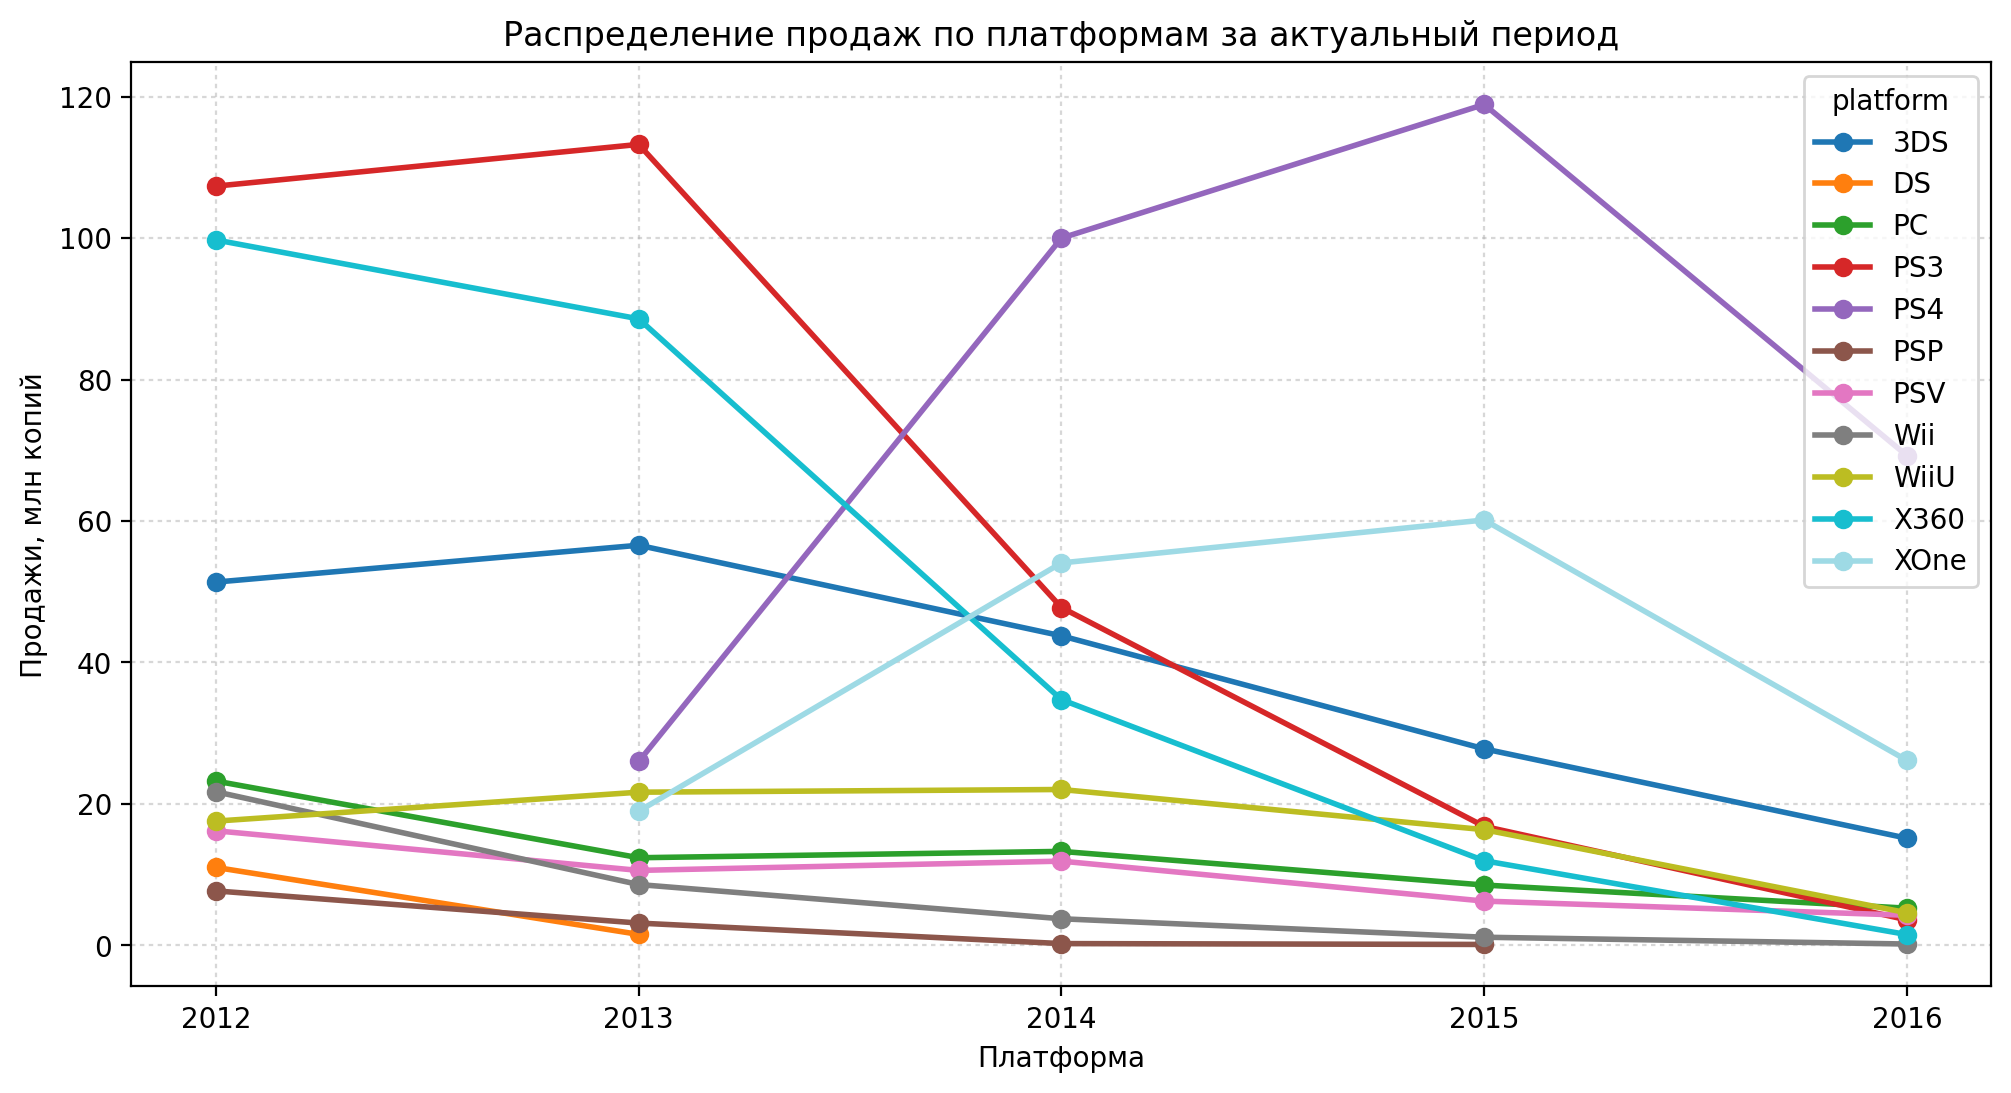

In [86]:
grouped_games = actual_games_df.pivot_table(index='year_of_release', columns='platform', 
                                            values='total_sales', aggfunc='sum')

ax = grouped_games.plot(kind='line', style='-o', figsize=(12, 6), linewidth=2, cmap='tab20')
ax.set_title('Распределение продаж по платформам за актуальный период')
ax.set_xlabel('Платформа')
ax.set_ylabel('Продажи, млн копий')
ax.set_xticks(np.arange(2012, 2017))
ax.grid(alpha=0.5, dashes=(2, 2))
pass

Данные за 2016 год не полные, поэтому оценим распределение продаж по платформам только по 2015 год включительно: 
- **Потенциально самыми прибыльными платформами можно считать Xbox One и PlayStation 4** — их жизненный цикл к 2016 году прошел только половину пути.
- Продажи на консолях PlayStation 3, Xbox 360, Nintendo 3DS падают — их жизненный цикл к 2016 году подходит к завершению.
- Продажи на консолях Nintendo DS и PSP завершились.

Построим график «ящик с усами» по глобальным продажам игр в разбивке по платформам за актульный период.

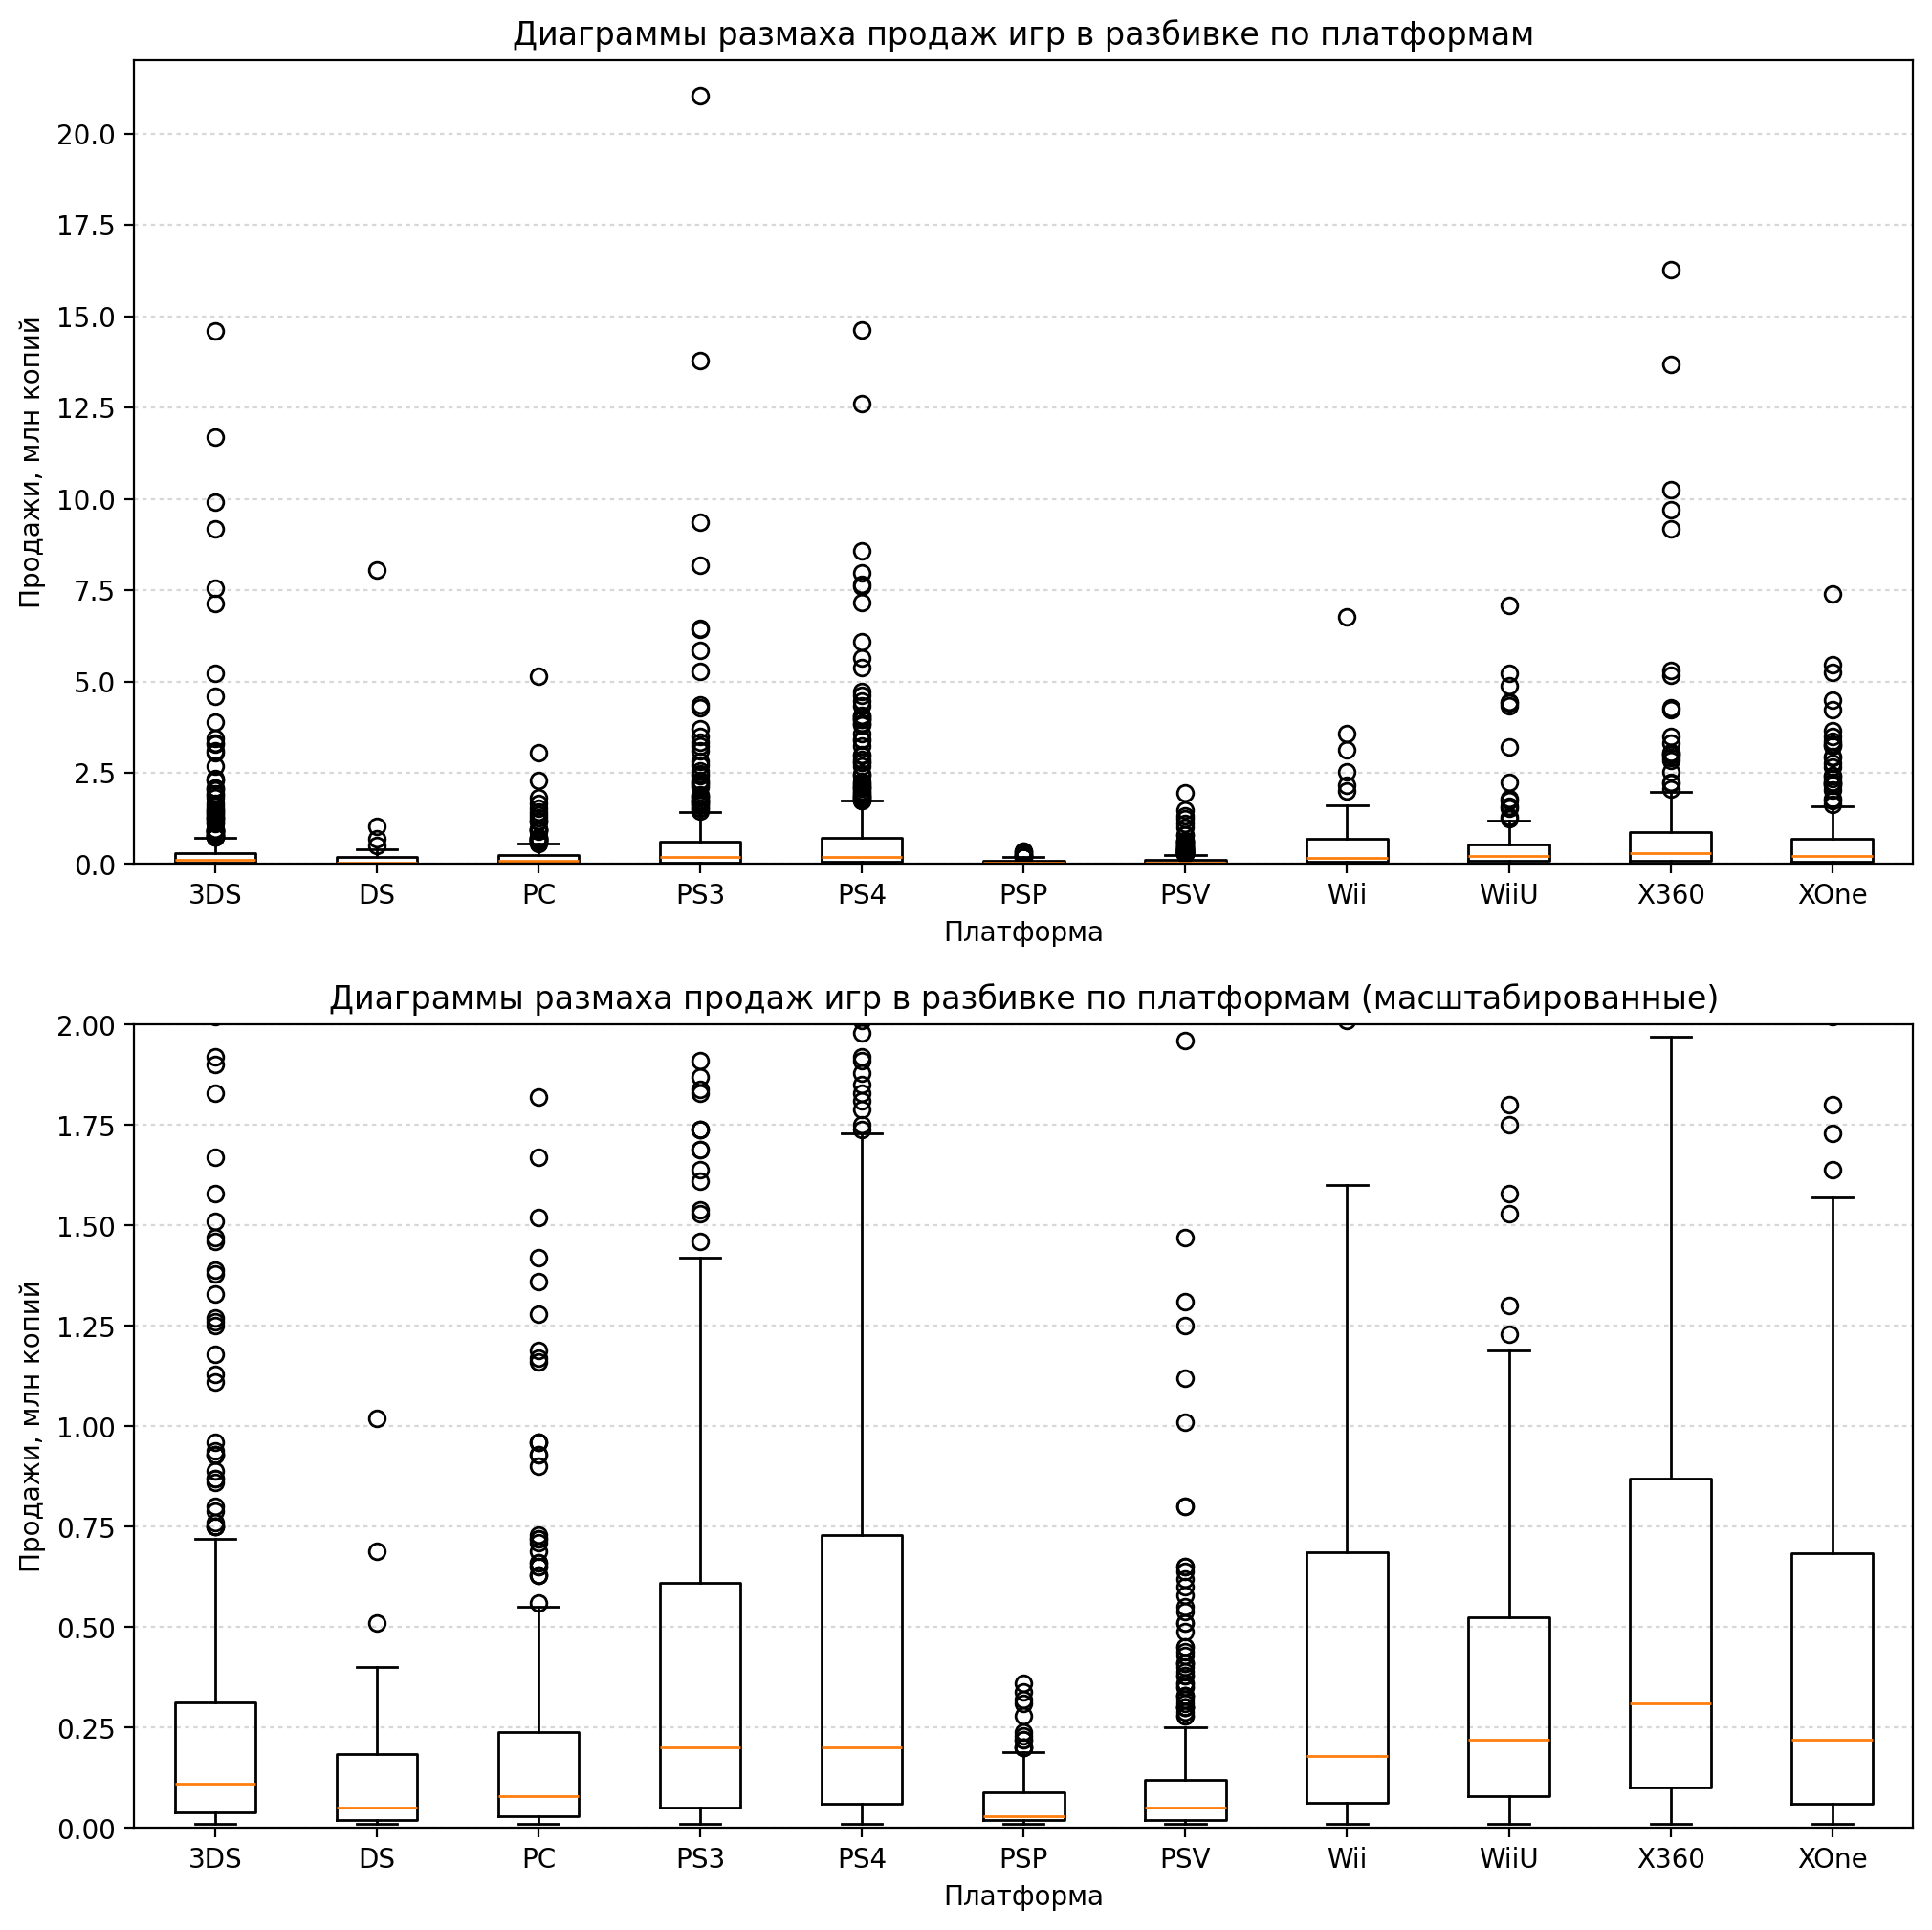

In [89]:
def display_boxplot(ax, data, title, ylim):
    ax.boxplot(x=[value.values for key, value in data], labels=data.groups.keys())
    ax.set_title(title)
    ax.set_xlabel('Платформа')
    ax.set_ylabel('Продажи, млн копий')
    ax.set_ylim(ylim)
    ax.grid(axis='y', alpha=0.5, dashes=(2, 2))


grouped_games = actual_games_df.groupby('platform')['total_sales']

fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 12))
display_boxplot(ax1, grouped_games, 'Диаграммы размаха продаж игр в разбивке по платформам', [0, 22])
display_boxplot(ax2, grouped_games, 'Диаграммы размаха продаж игр в разбивке по платформам (масштабированные)', [0, 2])

На диаграмме хорошо выделются консоли от Sony и Microsoft — **игры на платформах PlayStation 3/4 и Xbox 360/One продаются в большем колчестве экземпляров, чем игры на других платформах.**

### Связь оценок пользователей и критиков

Для начала сравним распределения оценок пользователей и критиков. Для этого приведём  все оценки к одной шкале «0-100» (нормируем оценки пользователей к 100).

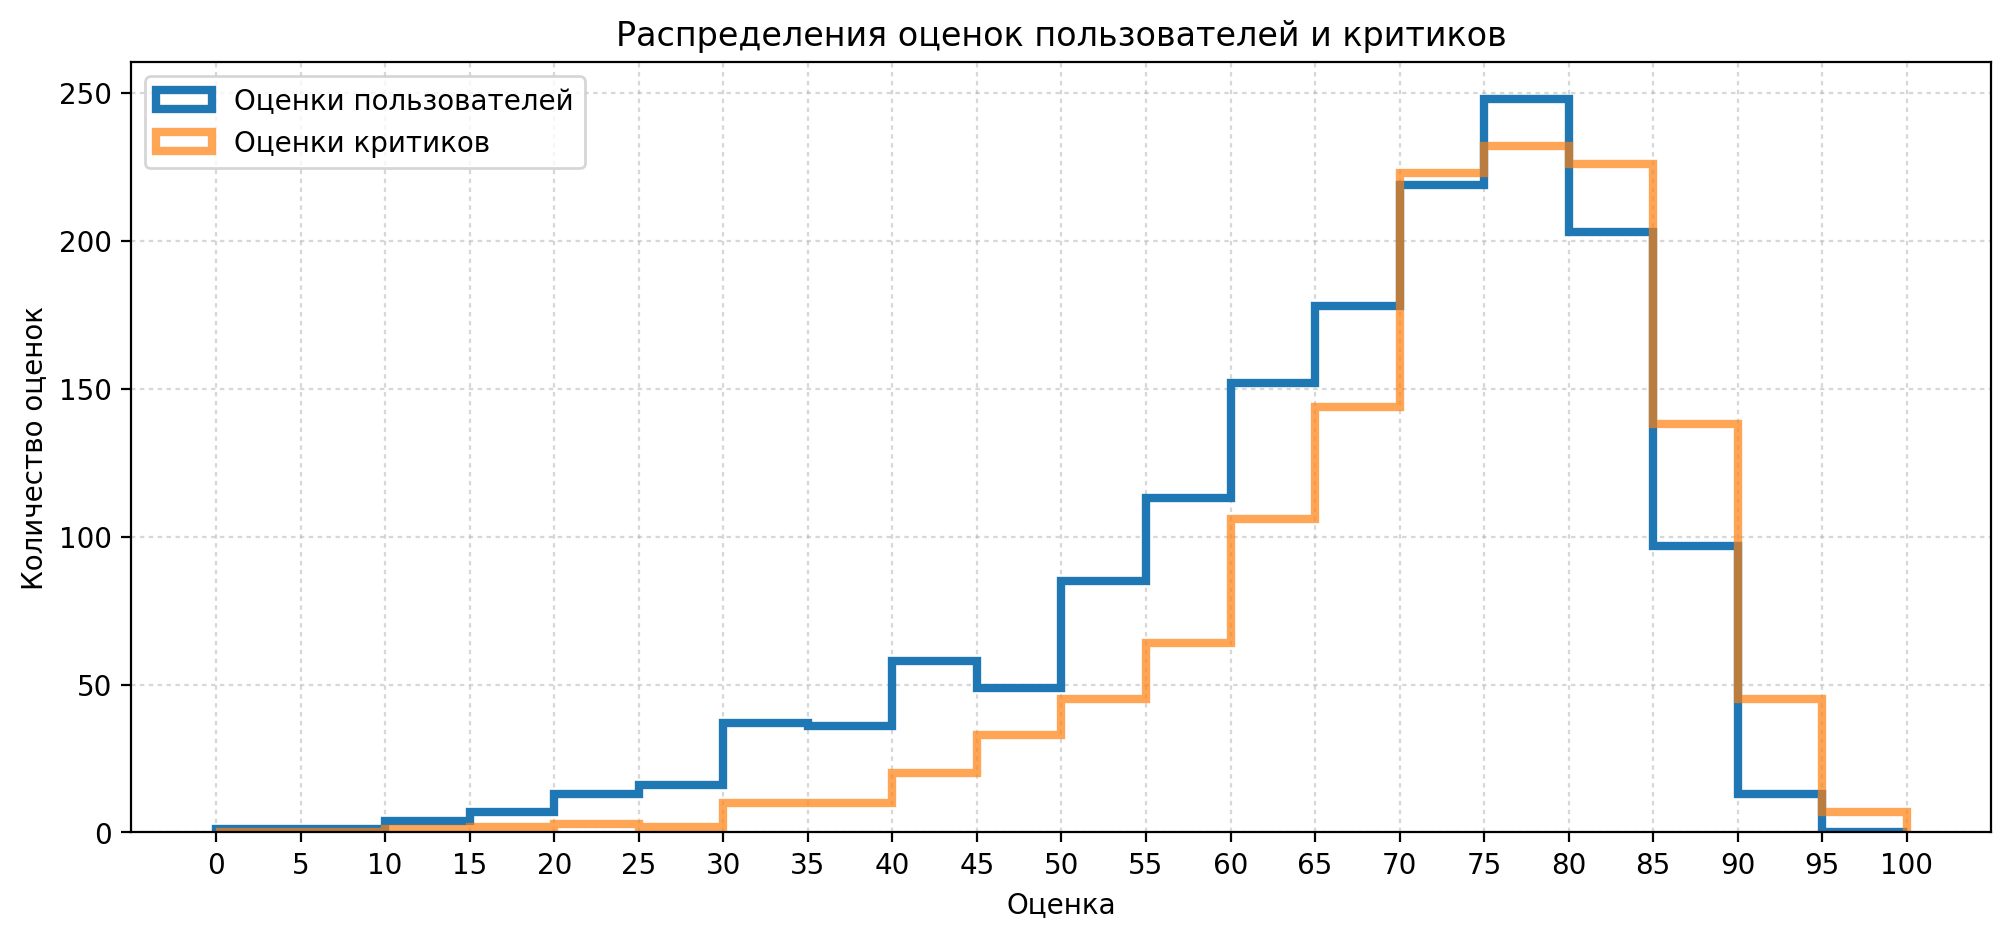

In [93]:
plt.figure(figsize=(12, 5))
ax = (actual_games_df['user_score'] * 10).plot(
    kind='hist',
    histtype='step',
    bins=20, 
    range=(0, 100),
    linewidth=3
)
actual_games_df['critic_score'].plot(
    kind='hist',
    histtype='step',
    bins=20, 
    range=(0, 100),
    linewidth=3,
    alpha=0.7,
    ax=ax
)
ax.legend(['Оценки пользователей', 'Оценки критиков'], loc='upper left')
ax.set_title('Распределения оценок пользователей и критиков')
ax.set_xlabel('Оценка')
ax.set_ylabel('Количество оценок')
ax.set_xticks(np.arange(0, 105, 5))
ax.grid(alpha=0.5, dashes=(2, 2))

In [94]:
display(f'Средняя оценка пользователей: {actual_games_df["user_score"].mean() * 10:.0f}',
        f'Средняя оценка критиков: {actual_games_df["critic_score"].mean():.0f}')

'Средняя оценка пользователей: 66'

'Средняя оценка критиков: 72'

На диаграмме мы видим практически одинаковые по форме распределения. Однако можно заметь, что распределение оценок пользователей смещено влево отностильно распределения оценок критиков. То есть **пользователи более критически подходят к оценке игр, чем критики** — ох уж эти «проплаченные» журналистские рецензии на игры. **Средняя оценка пользователей ~66 против ~70 у критиков (при одинаковой шкале «0-100»).**

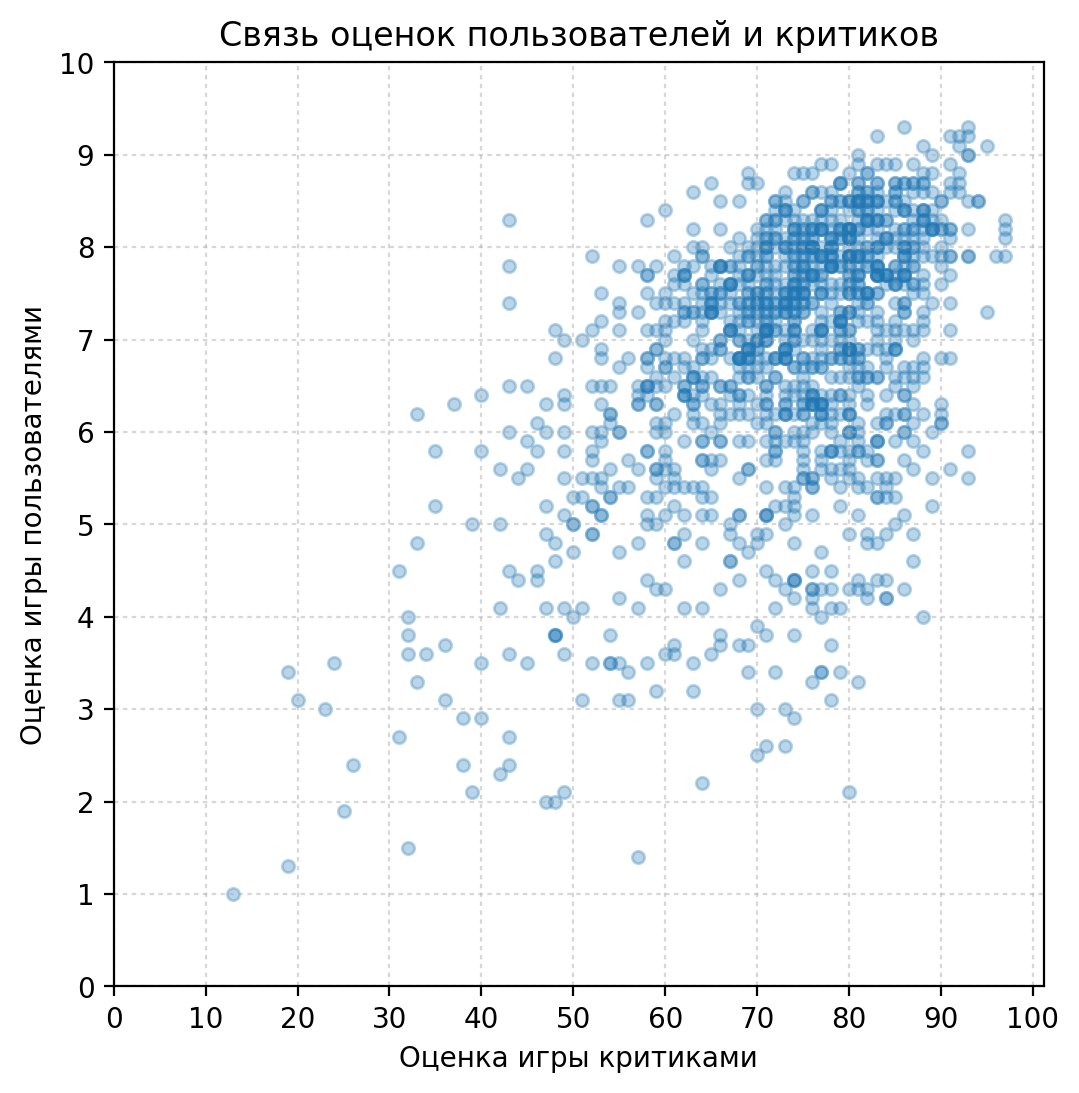

In [96]:
ax = actual_games_df.plot(x='critic_score', 
                          y='user_score', 
                          kind='scatter', 
                          alpha=0.3,
                          figsize=(6, 6))
ax.set_title('Связь оценок пользователей и критиков')
ax.set_xlabel('Оценка игры критиками')
ax.set_ylabel('Оценка игры пользователями')
ax.set_xticks(np.arange(0, 110, 10))
ax.set_yticks(np.arange(0, 11))
ax.grid(alpha=0.5, dashes=(2, 2))
pass

In [97]:
round(actual_games_df['user_score'].corr(actual_games_df['critic_score']), 2)

0.52

Коэффициент корреляции Пирсона равен 0.55, что говорит о **наличии положительной линейной связи оценок пользователей и критиков**, однако не слишком сильной — **мнения пользователей и критиков о некоторых играх могут существенно отличаться.**

### Влияние отзывов пользователей и критиков на продажи

Посмотрим, как влияют на продажи оценки пользователей и критиков. Для этого рассчитаем корреляцию между оценками и продажами в разных регионах на актульных платформах. Построим тепловые карты корреляций.

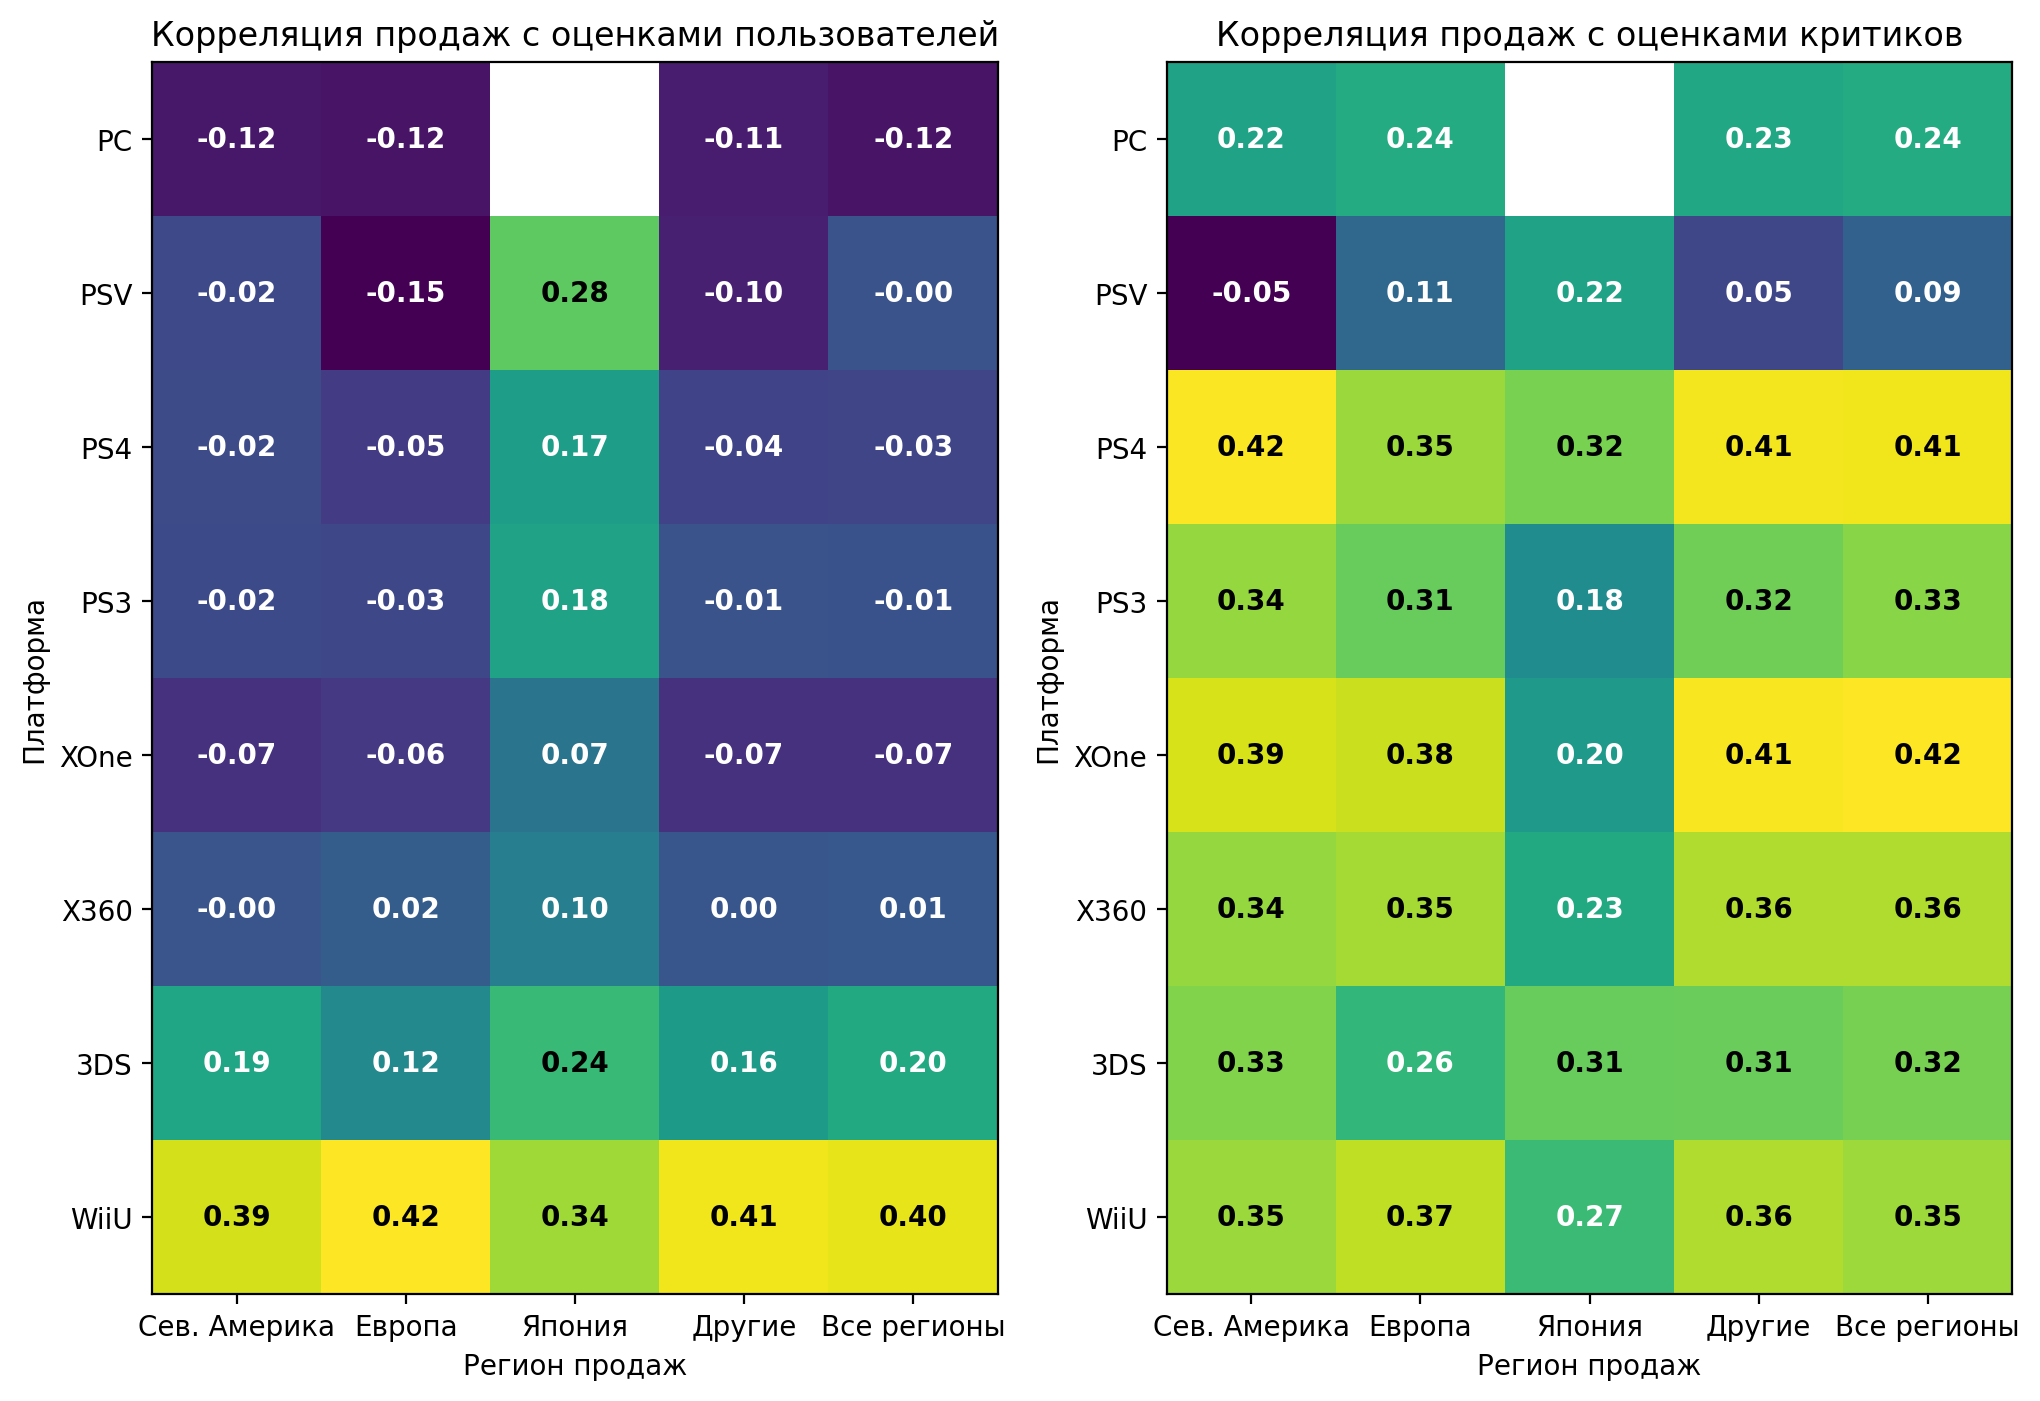

In [101]:
def calc_corr(data, score_key):
    filtered_data = data[data[score_key].notna()]
    sales_keys = ['na_sales', 'eu_sales', 'jp_sales', 'other_sales', 'total_sales']
    platform_keys = ['PC', 'PSV', 'PS4', 'PS3', 'XOne', 'X360', '3DS', 'WiiU']
    with np.errstate(divide='ignore', invalid='ignore'):
        result = pd.DataFrame(
            [[
                (filtered_data[filtered_data['platform'] == platform_key][sales_key]
                 .corr(filtered_data[filtered_data['platform'] == platform_key][score_key])) for sales_key in sales_keys
             ] for platform_key in platform_keys],
            columns=sales_keys, 
            index=platform_keys
        )
    return result


def display_heatmap(ax, data, title, color_threshold):
    im = ax.imshow(data, aspect='auto')
    for i in range(len(data.columns)):
        for j in range(len(data.index)):
            color = 'white'
            value = data.loc[data.index[j], data.columns[i]]
            if value >= color_threshold:
                color = 'black'
            text = ax.text(i, j, f'{value:.2f}', ha='center', va='center', color=color, weight='bold')
    ax.set_title(title)
    ax.set_xlabel('Регион продаж')
    ax.set_ylabel('Платформа')
    ax.set_xticks(np.arange(len(data.columns)))
    ax.set_yticks(np.arange(len(data.index)))
    ax.set_xticklabels(['Сев. Америка', 'Европа', 'Япония', 'Другие' , 'Все регионы'])
    ax.set_yticklabels(data.index)
    

user_score_corr = calc_corr(actual_games_df, 'user_score')
critic_score_corr = calc_corr(actual_games_df, 'critic_score')

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 8))
display_heatmap(ax1, user_score_corr, 'Корреляция продаж с оценками пользователей', 0.2)
display_heatmap(ax2, critic_score_corr, 'Корреляция продаж с оценками критиков', 0.3)

По тепловым картам **корреляции продаж с оценками пользователей и критиков можно сделать несколько выводов**:
- Линейная зависимость между продажами и оценками если и проявляется, то её не назвать сильной.
- На общем фоне выделяются продажи игр в Японии: продажи в этом регион сильнее зависят от пользовательских оценок, чем в других регионах.
- Сильнее других от оценок пользователей зависят продажи на Nintendo Wii U.
- Наименее завимы от оценок пользователей продажи игр персональных компьютерах и консолях от Microsoft и Sony.
- С точки зрения оценок критиков продажи игр в Японии тоже выделяются — в этом регионе оценки критиков оказывают наименьшее влияние на продажи игр.
- Больше других зависят от мнения критиков продажи игр на консолях нового поколения от Microsoft и Sony — PlayStation 4 и Xbox One.

Получается, что **продажи игр на консолях от Nintendo, ориентированных на японский рынок, сильнее других подвержены влиянию пользовательских оценок, при этом оценки критиков оказывают на них наименьшее влияние. Продажи игр на PlayStation 4 и Xbox One наоборот — не зависят от пользовательских оценок и сильнее других подвержены влиянию оценок критиков.**

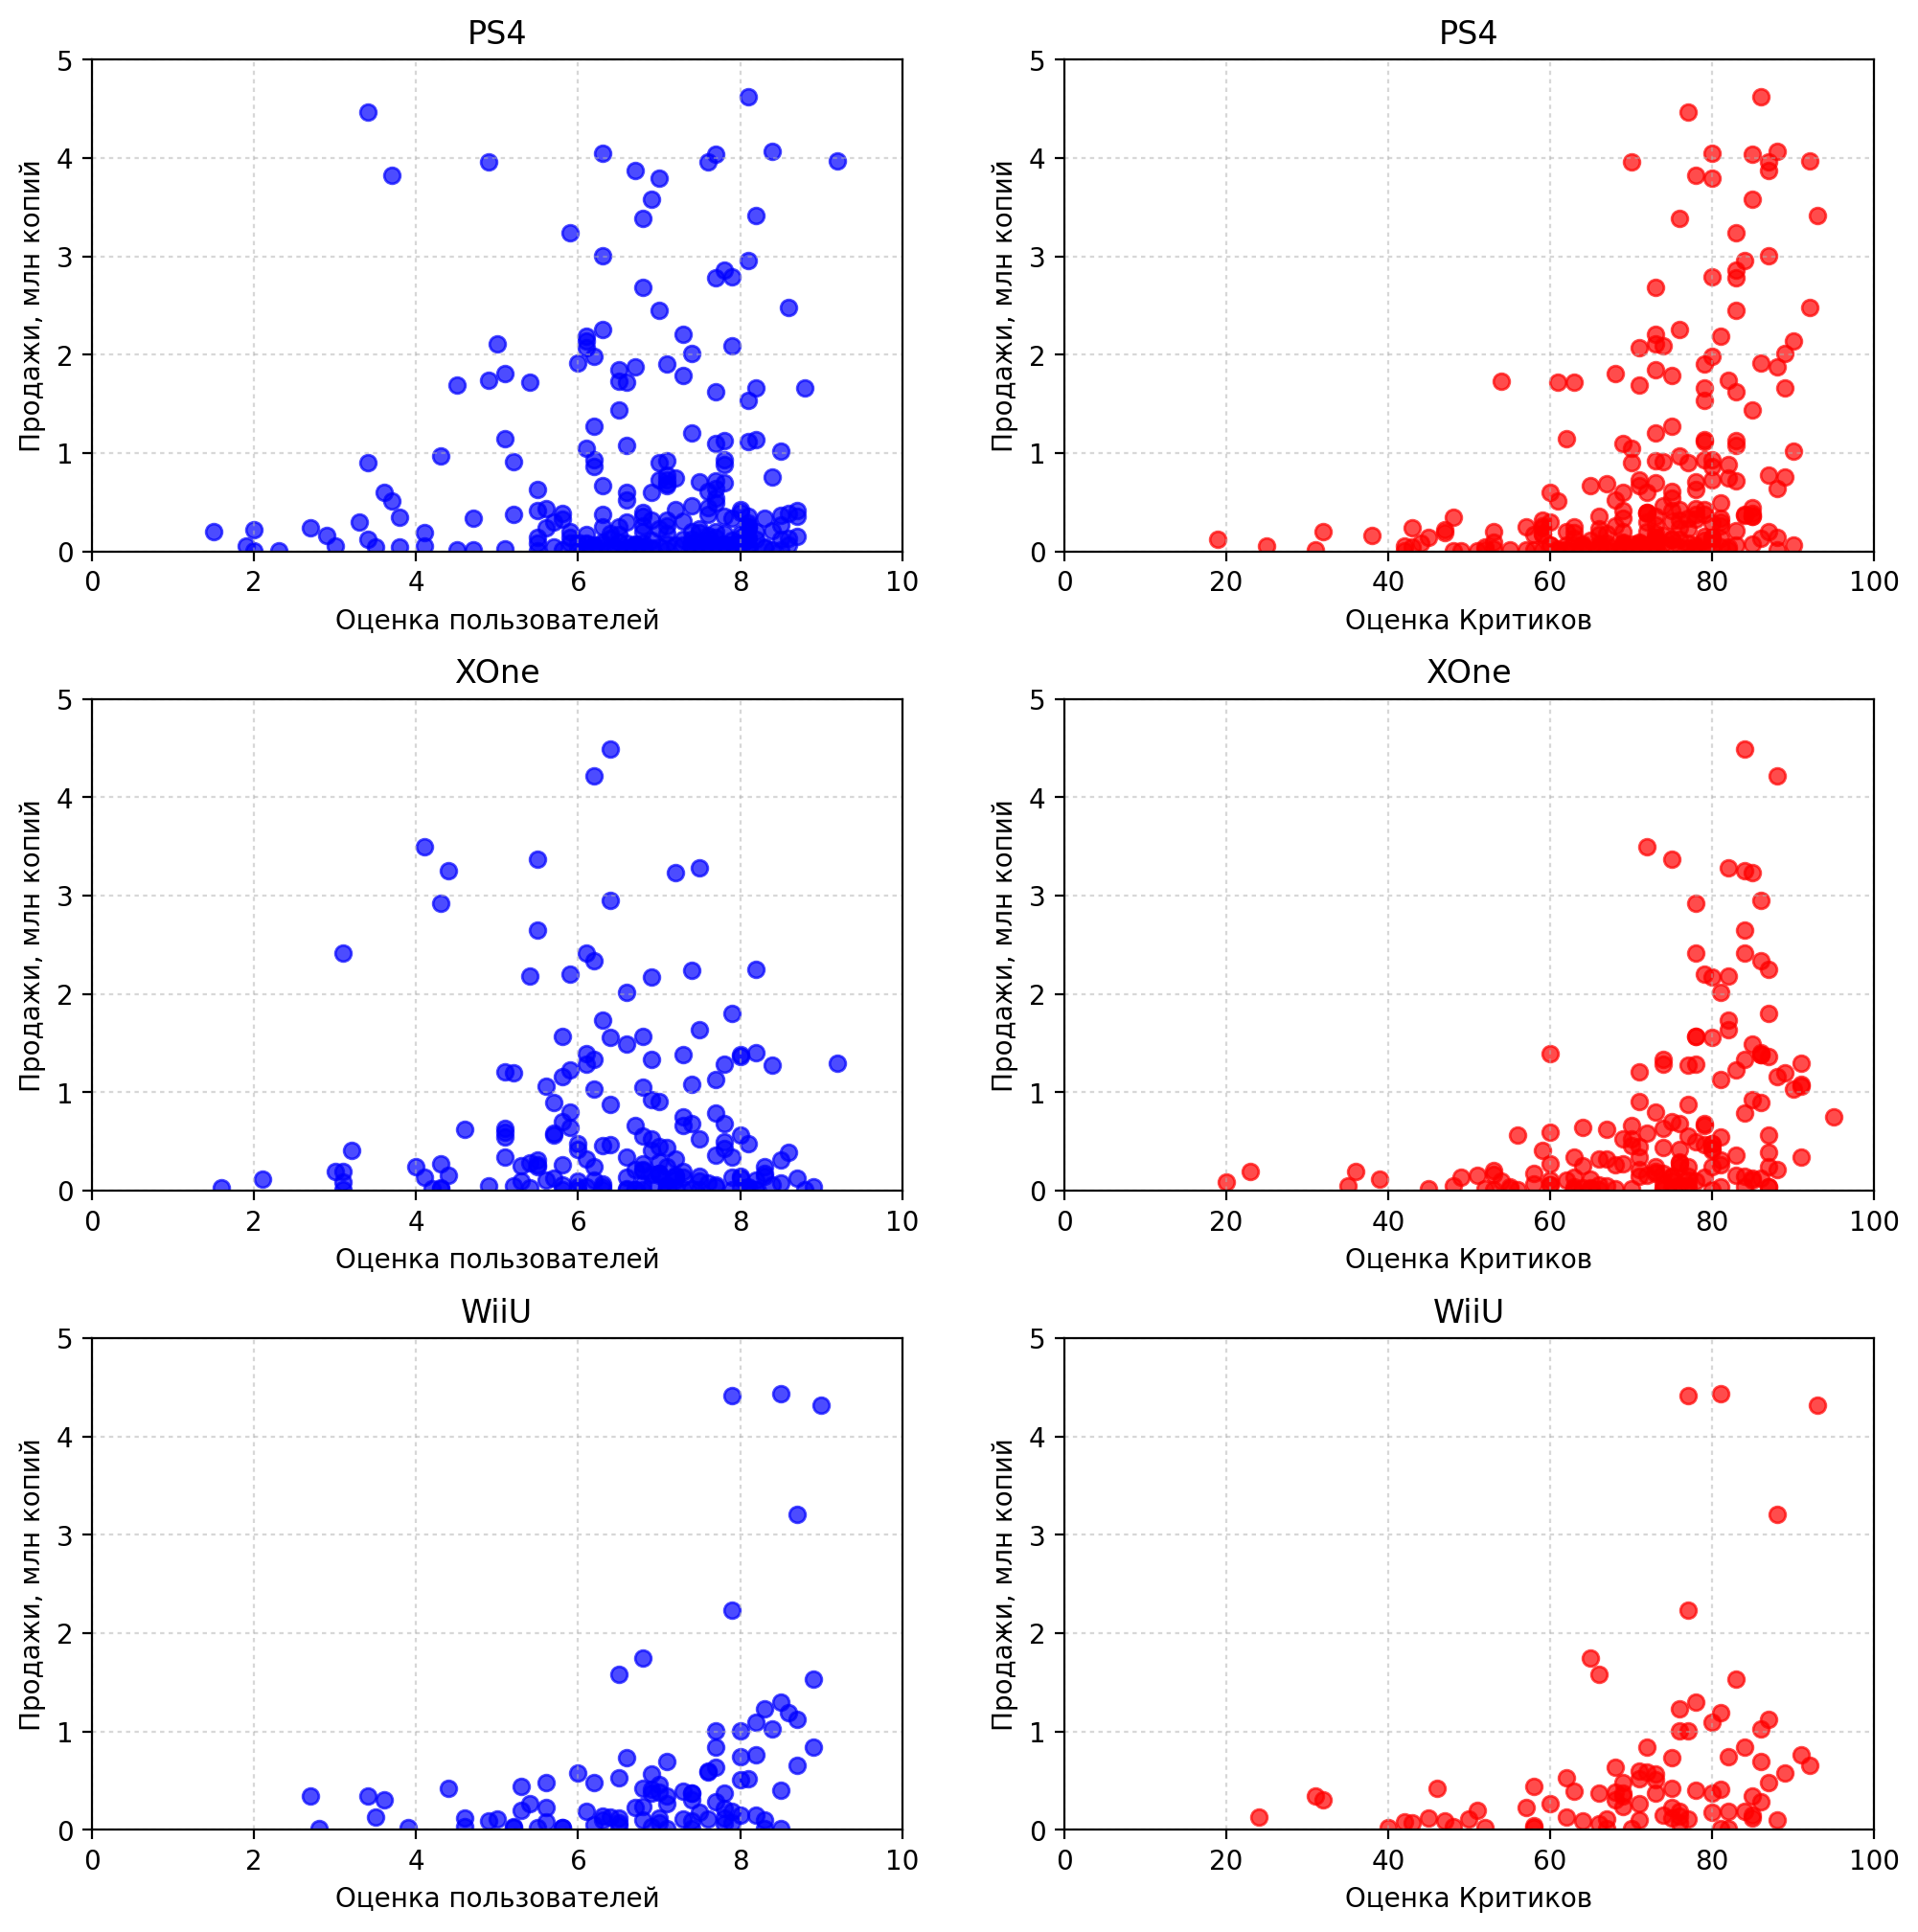

In [103]:
def display_scatter(ax, data, score_key, xlim, ylim, title, xlabel, color):
    ax.scatter(data[score_key],
               data['total_sales'],
               alpha=0.7, 
               color=color)
    ax.set_title(title)
    ax.set_xlabel(xlabel)
    ax.set_ylabel('Продажи, млн копий')
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)
    ax.grid(alpha=0.5, dashes=(2, 2))


fig, ax = plt.subplots(3, 2, figsize=(12, 12))
fig.subplots_adjust(hspace=0.3)
for ind, platform_key in enumerate(['PS4', 'XOne', 'WiiU']):
    filtered_data = actual_games_df.query('platform == @platform_key')
    display_scatter(ax[ind][0], filtered_data, 'user_score', (0, 10), (0, 5), 
                    platform_key, 'Оценка пользователей', 'blue')
    display_scatter(ax[ind][1], filtered_data, 'critic_score', (0, 100), (0, 5), 
                    platform_key, 'Оценка Критиков', 'red')

На диаграммах рассеяния для PlayStation 4 и Xbox One мы видим схожую ситуацию — что игры могут продаваться хорошо, несмотря на плохие пользовательские оценки, но оценки критиков оказывают на продажи большее влияние: чем лучше оценки критиков, тем лучше продажи. А вот на продажи на Nintendo Wii U явно оказывают влияние пользовательские оценки.

### Распределение игр по жанрам, прибыльность жанров

Посмотрим на общее распределение игр по жанрам. Попытаемся определить самые прибыльные жанры, выделм жанры с высокими и низкими продажами.

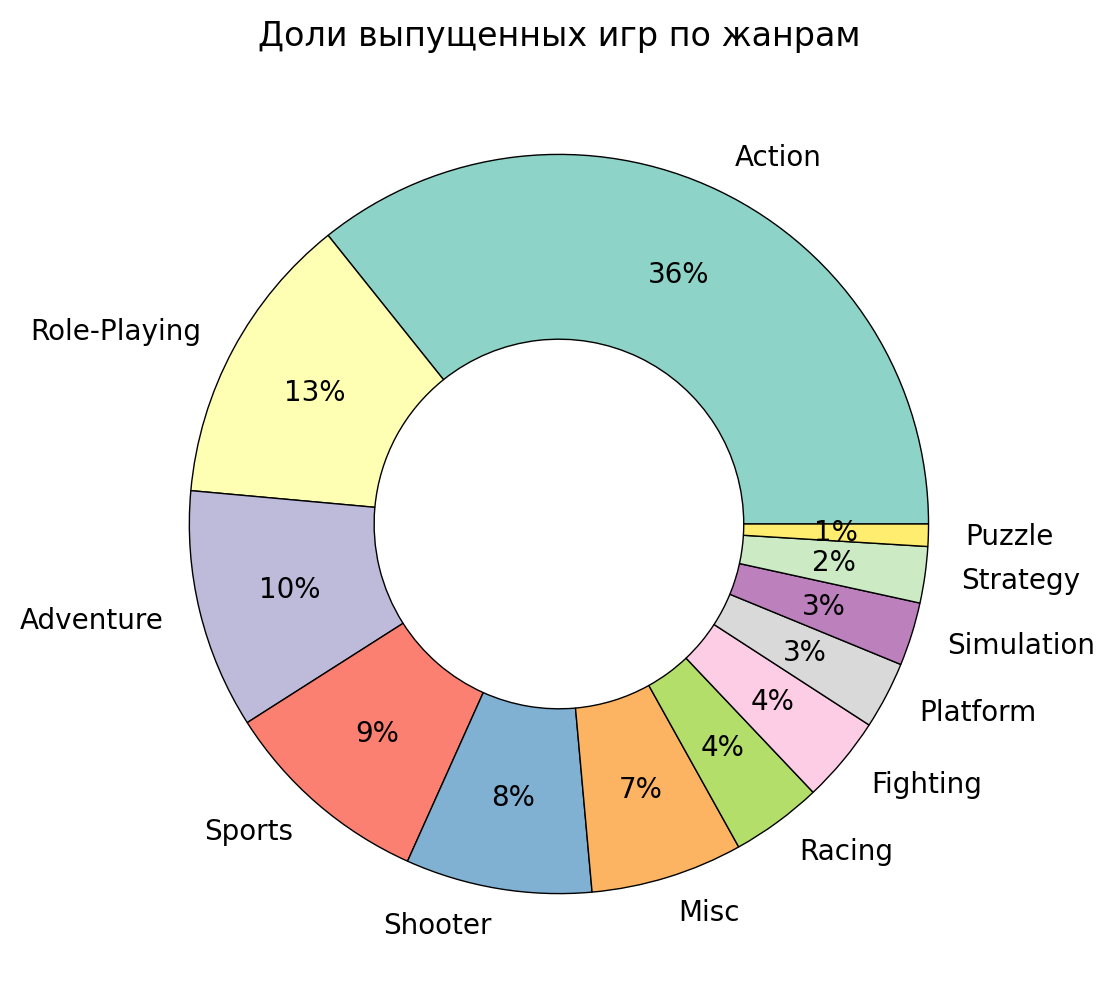

In [107]:
sales_by_genres = actual_games_df.pivot_table(index='genre', 
                                              values='total_sales', 
                                              aggfunc=['count', 'sum', 'median'])
sales_by_genres.columns = ['total_sales_count', 'total_sales_sum', 'total_sales_median']

ax = (sales_by_genres['total_sales_count']
      .sort_values(ascending=False)
      .plot(kind='pie', 
            figsize=(6, 6), 
            autopct='%.0f%%', 
            pctdistance=0.75,
            wedgeprops={'linewidth': 0.5, 'edgecolor': 'black', 'width': 0.5},
            cmap='Set3'))
ax.set_title('Доли выпущенных игр по жанрам')
ax.set_ylabel('')
pass

**Больше трети выпущенных игр (36%) — это игры в жанре «Экшен». В топ-5 по количеству выпущенных игр также входят ролевые игры (13%), приключенческие игры (10%), спортивные симуляторы (9%) и шутеры (8%).** Примерно 7% выпущенных игр невозможно описать каким-то одним конкретным жанром (категория Misc).

Посмотрим, какие доли рынка игровой индустрии занимают различные жанры.

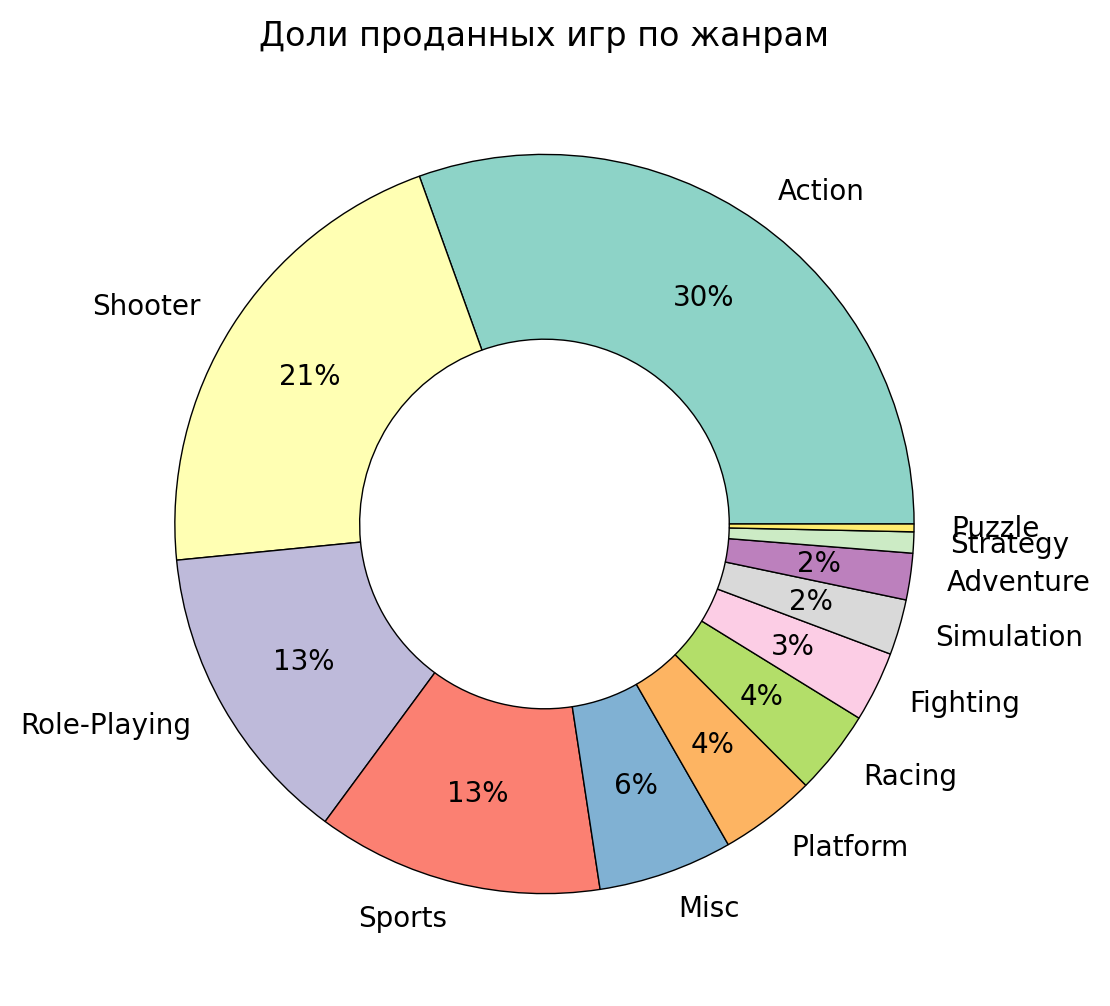

In [110]:
ax = (sales_by_genres['total_sales_sum']
      .sort_values(ascending=False)
      .plot(kind='pie', 
            figsize=(6, 6), 
            autopct=lambda x: f'{x:.0f}%' if round(x) >= 2 else '', 
            pctdistance=0.75,
            wedgeprops={'linewidth': 0.5, 'edgecolor': 'black', 'width': 0.5},
            cmap='Set3'))
ax.set_title('Доли проданных игр по жанрам')
ax.set_ylabel('')
pass

**Продажи игр в жанре «Экшен» занимают почти треть рынка (30%).** При этом продажи шутеров на втором месте (21%), хотя по количеству выпущенных игр этот жанр на пятом месте. А вот с приключенческими играми наоборот — продажи таких игр составляют всего 2% от рынка, хотя по количеству выпущенных игр жанр «Приключения» входит в топ-5. 

Посмотрим, почему так произошло с шутерами и приключенческими играми — оценим медианное количество проданных копий игр различных жанров.

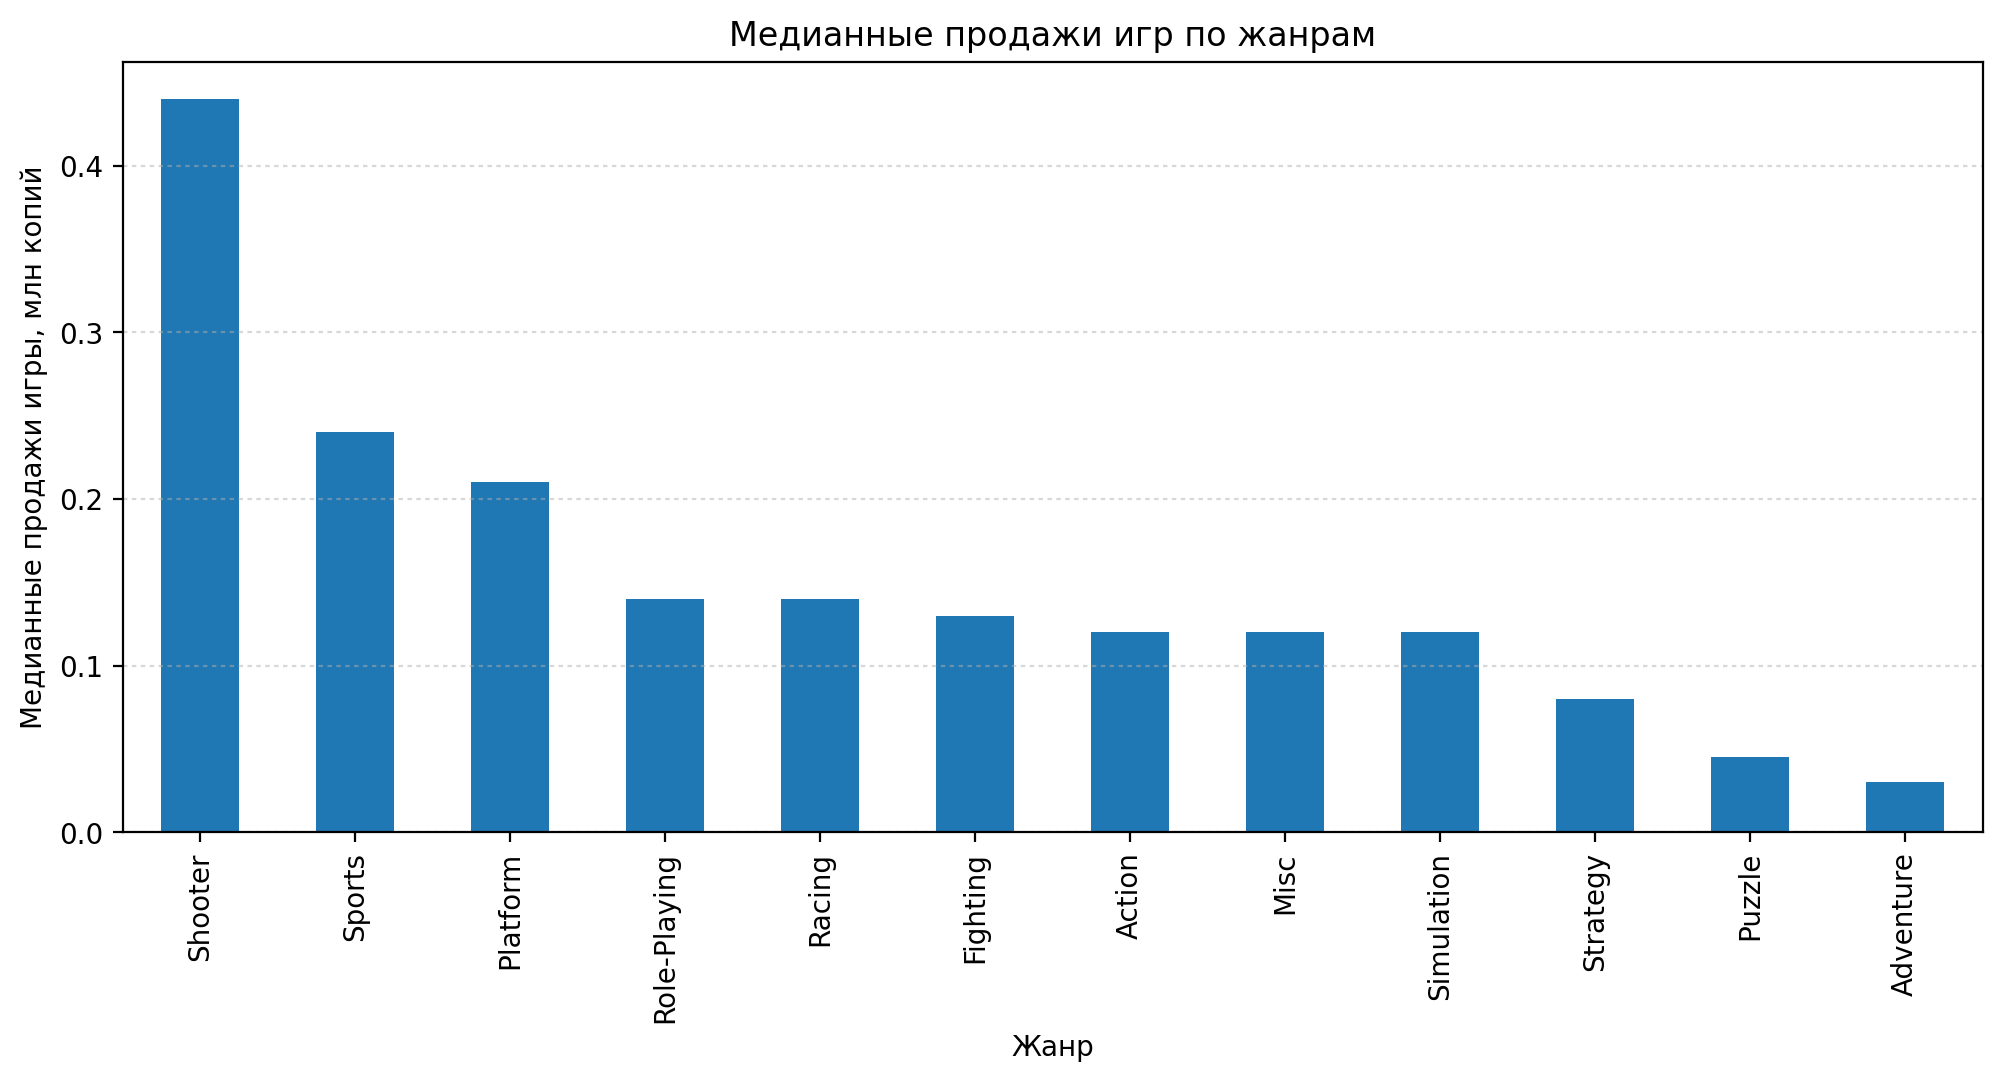

In [112]:
ax = (sales_by_genres['total_sales_median']
      .sort_values(ascending=False)
      .sort_values(ascending=False)
      .plot(kind='bar', 
            figsize=(12, 5)))
ax.set_title('Медианные продажи игр по жанрам')
ax.set_xlabel('Жанр')
ax.set_ylabel('Медианные продажи игры, млн копий')
ax.grid(axis='y', alpha=0.5, dashes=(2, 2))
pass

Разработчикам игр на заметку: **наилучшие медианные продажи показывают шутеры, а вот у приключенческих игр самые низкие медианные продажи.**

Построим график «ящик с усами» по глобальным продажам игр в разбивке по жанрам за актульный период.

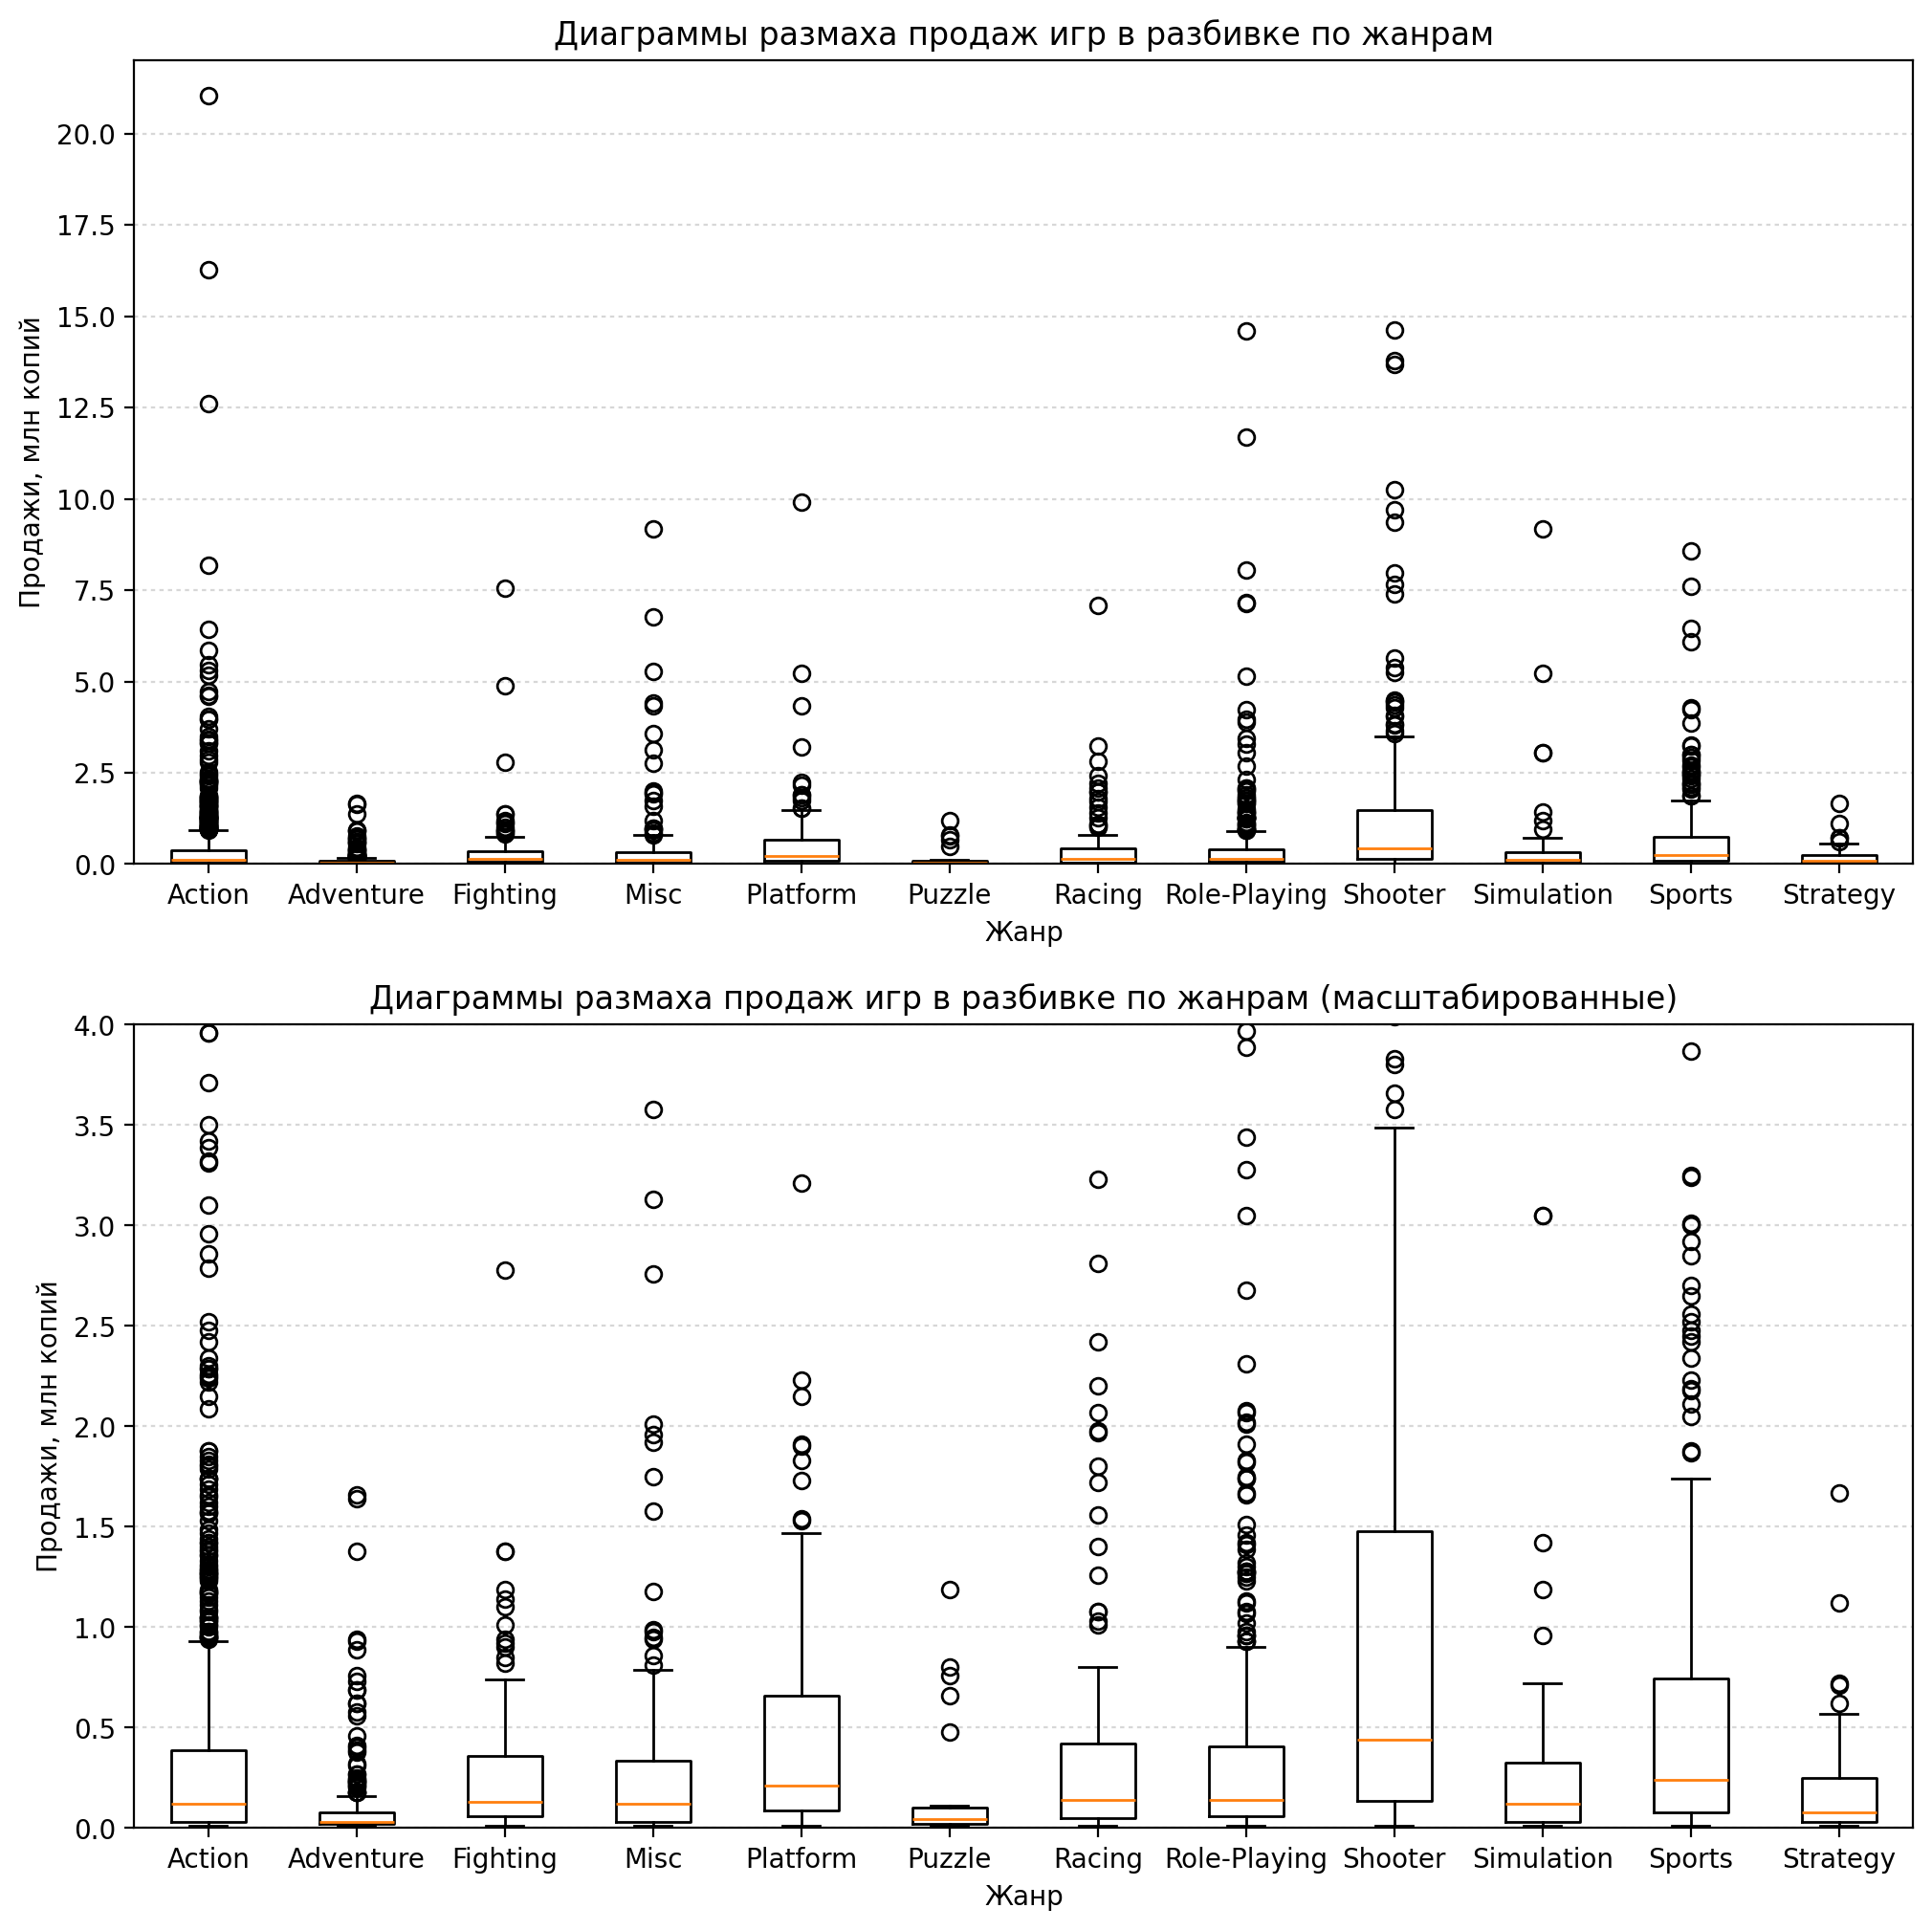

In [115]:
def display_boxplot(ax, data, title, ylim):
    ax.boxplot(x=[value.values for key, value in data], labels=data.groups.keys())
    ax.set_title(title)
    ax.set_xlabel('Жанр')
    ax.set_ylabel('Продажи, млн копий')
    ax.set_ylim(ylim)
    ax.grid(axis='y', alpha=0.5, dashes=(2, 2))


grouped_games = actual_games_df.groupby('genre')['total_sales']

fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 12))
display_boxplot(ax1, grouped_games, 'Диаграммы размаха продаж игр в разбивке по жанрам', [0, 22])
display_boxplot(ax2, grouped_games, 'Диаграммы размаха продаж игр в разбивке по жанрам (масштабированные)', [0, 4])

### Самая продаваемая игра всех времён и народов

Узнаем, какая же игра является самой продаваемой в истории по состоянию на 2016 год.

In [118]:
games_df.pivot_table(index='name', values='total_sales', aggfunc='sum') \
        .sort_values(by='total_sales', ascending=False).head(3)

,total_sales
name,
Wii Sports,82.54
Grand Theft Auto V,56.58
Super Mario Bros.,45.31


Нет, пока что не Grand Theft Auto V. На первом месте Wii Sports.

## Портрет пользователя каждого региона

### Самые популярные платформы

Определим для пользователя каждого региона (Северная Америка, Европа, Япония) самые популярные платформы (топ-5).

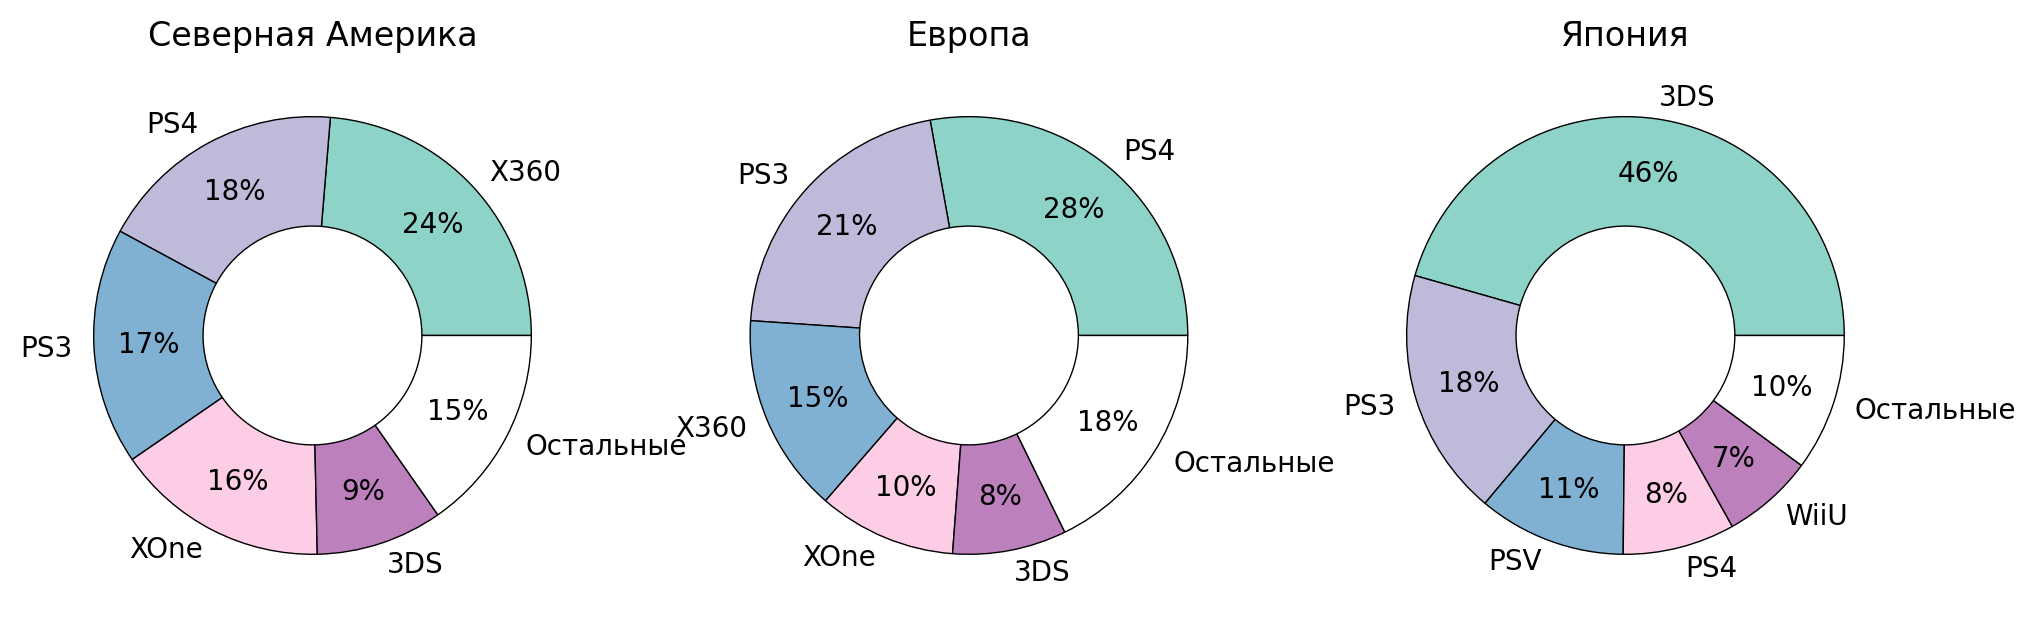

In [123]:
def grouped_top5(data, group_key, sales_key):
    top5_keys = list(data.groupby(group_key)[sales_key].sum().sort_values(ascending=False)[:5].index)
    modified_data = data.copy()
    modified_data['in_top5'] = modified_data[group_key].isin(top5_keys)
    modified_data['group_name'] = modified_data[group_key].where(modified_data['in_top5'], 'Остальные')
    grouped_data = modified_data.pivot_table(index='group_name', values=[sales_key, 'in_top5'],
                                             aggfunc={sales_key: 'sum', 'in_top5': 'first'})
    return grouped_data.sort_values(by=['in_top5', sales_key], ascending=False)


def display_donut(ax, data, sales_key, title):
    data[sales_key].plot(kind='pie', 
                         autopct='%.0f%%', 
                         pctdistance=0.75,
                         wedgeprops={'linewidth': 0.5, 'edgecolor': 'black', 'width': 0.5},
                         cmap='Set3', 
                         ax=ax)
    ax.set_title(title)
    ax.set_ylabel('')
    for i, index_value in enumerate(data.index):
        if data.loc[index_value, 'in_top5'] == False or index_value == 'WR':
            ax.patches[i].set_facecolor('white')


regions = [('na_sales', 'Северная Америка'), ('eu_sales', 'Европа'), ('jp_sales', 'Япония')]

fig, ax = plt.subplots(1, 3, figsize=(12, 4))
for i in range(len(regions)):
    grouped_games = grouped_top5(actual_games_df, 'platform', regions[i][0])
    display_donut(ax[i], grouped_games, regions[i][0], regions[i][1])

**Топ-5 платформ для пользователей из разных регионов** выглядит следующим образом:

- Северная Америка: Xbox 360, PlayStation 4, PlayStation3, Xbox One, Nintendo 3DS;
- Европа: PlayStation 4, PlayStation 3, Xbox 360, Xbox One, Nintendo 3DS;
- Япония: Nintendo 3DS, PlayStation 3, PlayStation Vita, PlayStation 4, Nintendo Wii.

### Самые популярные жанры

Определим для пользователя каждого региона (Северная Америка, Европа, Япония) самые популярные жанры (топ-5).

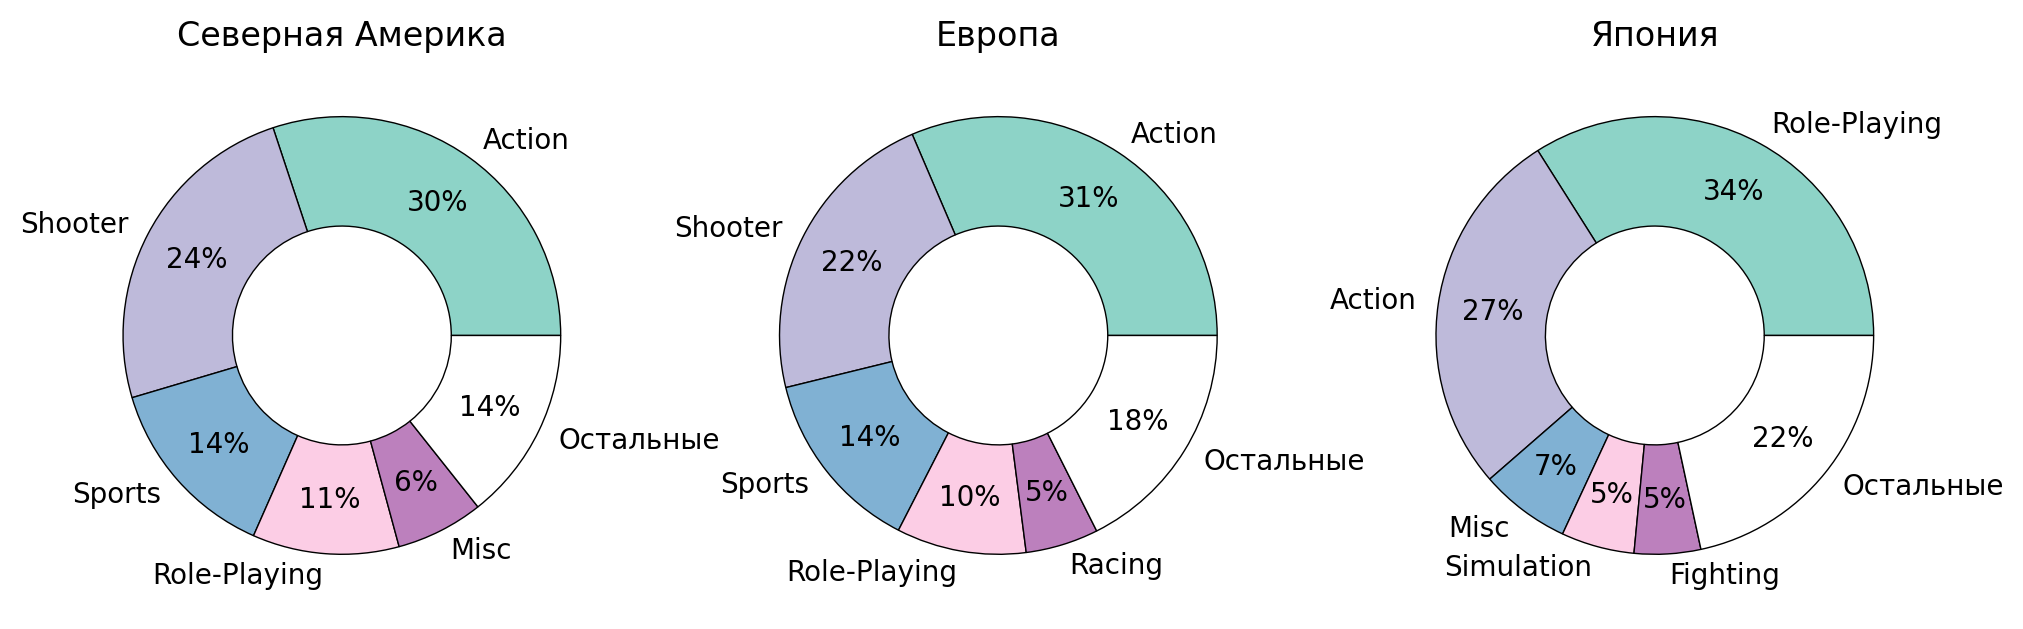

In [127]:
fig, ax = plt.subplots(1, 3, figsize=(12, 4))
for i in range(len(regions)):
    grouped_games = grouped_top5(actual_games_df, 'genre', regions[i][0])
    display_donut(ax[i], grouped_games, regions[i][0], regions[i][1])

**Топ-5 жанров для пользователей из разных регионов** выглядит следующим образом:

- Северная Америка: «Экшн», шутеры, спортивные симуляторы, ролевые игры, категория «Разное»;
- Европа: «Экшн», шутеры, спортивные симуляторы, ролевые игры, гонки;
- Япония: ролевые игры, «Экшн», категория «Разное», симуляторы, файтинги.

Можно заметить, что жанровые предпочтения игроков из Северной Америки и Европы практически совпадают.

### Влияние рейтинга ESRB на продажи

Проанализируем, влияет ли рейтинг ESRB на продажи в отдельном регионе.

In [131]:
actual_games_df['rating'].value_counts()

rating
WR      1275
M        498
T        412
E        394
E10+     306
Name: count, dtype: int64

Попробуем расшифровать значения:

- `WR (Without rating)` — Без рейтинга
- `E (Everyone)` — Для всех
- `E10+ (Everyone 10 and older)` — Для всех от 10 лет и старше
- `T (Teen)` — Подросткам
- `M (Mature)` — Для взрослых

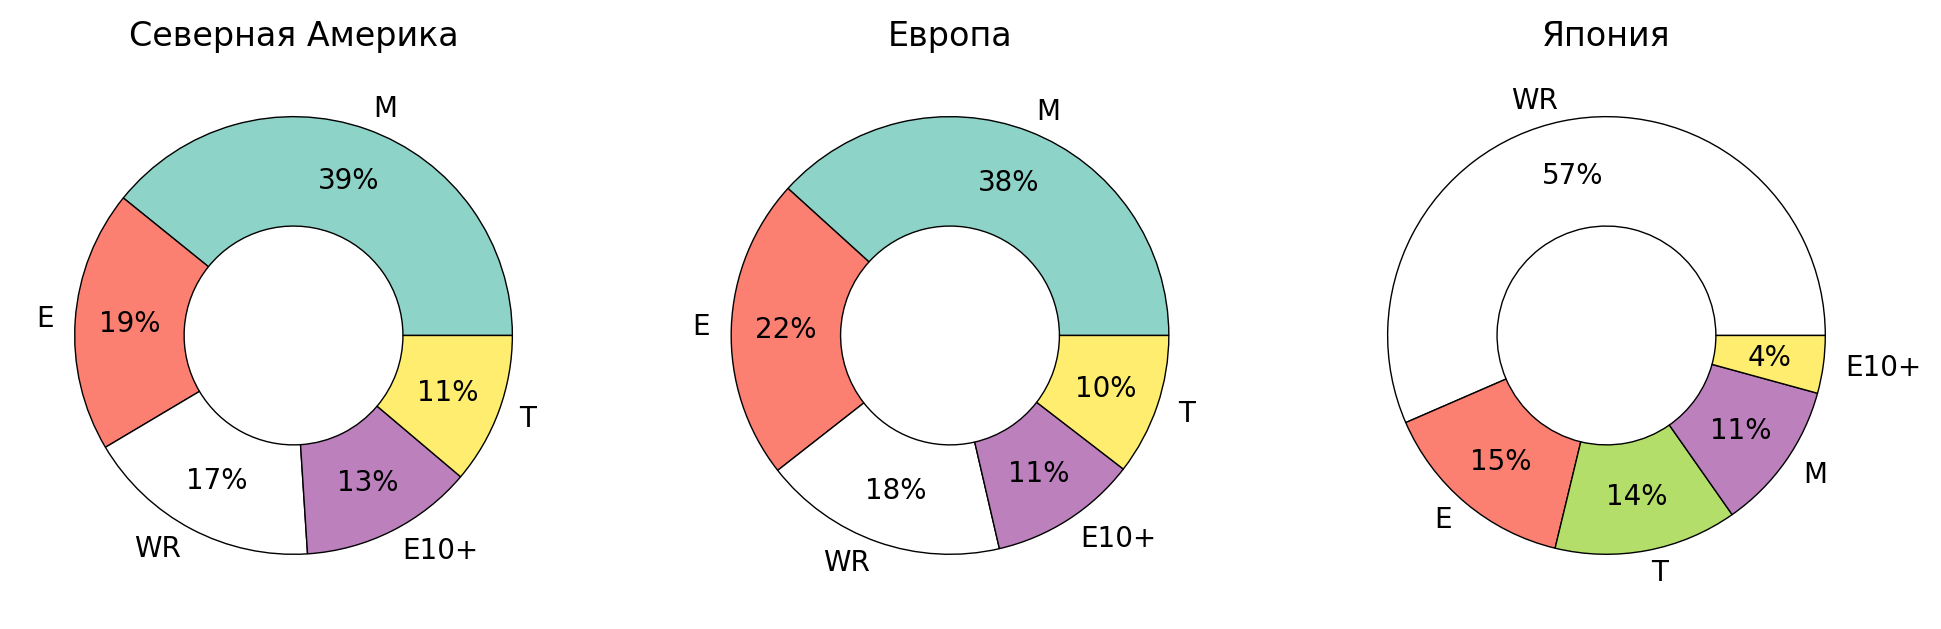

In [133]:
fig, ax = plt.subplots(1, 3, figsize=(12, 4))
for i in range(len(regions)):
    grouped_games = grouped_top5(actual_games_df, 'rating', regions[i][0])
    display_donut(ax[i], grouped_games, regions[i][0], regions[i][1])

На диаграммах можно заметить, что:

- в Северной Америке и Европе на первом месте по продажам игры с рейтингом ESRB «Для взрослых», что не удивительно, учитывая жанровые предпочтения игроков из этих регионов (шутеры на втором месте по продажам);
- в Японии более половины игр продается без рейтинга ESRB, то есть в данном регионе рейтинг ESRB не оказывает существенного влияния на продажи.

## Проверка гипотез

### Гипотеза 1

Проверим гипотезу о том, что средние пользовательские рейтинги платформ Xbox One и PC одинаковые. Для проверки двусторонней гипотезы о равенстве среднего двух генеральных совокупностей по взятым из них выборкам нам потребуется провести двусторонний t-тест. Сформулируем нулевую и альтернативную гипотезы:

- H0 (нулевая гипотеза): средние пользовательские рейтинги указанных платформ равны.
- H1  (альтернативная гипотеза): средние пользовательские рейтинги указанных платформ не равны.

In [138]:
# оценки игр на Xbox One
first_platform = actual_games_df.query('platform == "XOne" and user_score.notna()')['user_score'].values
# оценки игр на персональных компьютерах
second_platform = actual_games_df.query('platform == "PC" and user_score.notna()')['user_score'].values

# уровень статистической значимости
alpha = 0.05

results = st.ttest_ind(first_platform, second_platform, alternative='two-sided')
display(f'p-значение: {results.pvalue}')

if results.pvalue < alpha:
    display('Отвергаем нулевую гипотезу')
else:
    display('Не получилось отвергнуть нулевую гипотезу')

'p-значение: 0.5535080500643661'

'Не получилось отвергнуть нулевую гипотезу'

Полученный результат говорит о том, что **нет оснований отвергнуть гипотезу о том, что средние пользовательские рейтинги платформ Xbox One и PC равны**. Значение p-value показывает: вероятность случайно получить такое или большее различие равна ~55%. Это явно слишком большая вероятность, чтобы делать вывод о значимом различии между средними пользовательскими рейтингами платформ Xbox One и PC.

In [140]:
display(f'Средний пользовательский рейтинг игр на Xbox One: {first_platform.mean():.1f}')
display(f'Средний пользовательский рейтинг игр на ПК: {second_platform.mean():.1f}')

'Средний пользовательский рейтинг игр на Xbox One: 6.5'

'Средний пользовательский рейтинг игр на ПК: 6.4'

### Гипотеза 2

Проверим гипотезу о том, что средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные. Для проверки двусторонней гипотезы о равенстве среднего двух генеральных совокупностей по взятым из них выборкам нам потребуется провести двусторонний t-тест. Сформулируем нулевую и альтернативную гипотезы:

- H0 (нулевая гипотеза): средние пользовательские рейтинги указанных жанров равны.
- H1 (альтернативная гипотеза): средние пользовательские рейтинги указанных жанров не равны.

In [143]:
# оценки игр в жанре Action
first_genre = actual_games_df.query('genre == "Action" and user_score.notna()')['user_score'].values
# оценки игр в жанре Sports
second_genre = actual_games_df.query('genre == "Sports" and user_score.notna()')['user_score'].values

# уровень статистической значимости
alpha = 0.05

results = st.ttest_ind(first_genre, second_genre, alternative='two-sided')
display(f'p-значение: {results.pvalue}')

if results.pvalue < alpha:
    display('Отвергаем нулевую гипотезу')
else:
    display('Не получилось отвергнуть нулевую гипотезу')

'p-значение: 4.804523380462917e-26'

'Отвергаем нулевую гипотезу'

Полученное значение p-value (~0) меньше заданного уровня значимости, поэтому можно отвергнуть нулевую гипотезу. **Есть основания говорить, что средние пользовательские рейтинги жанров Action и Sports разные**.

In [145]:
display(f'Средний пользовательский рейтинг игр в жанре Action: {first_genre.mean():.1f}')
display(f'Средний пользовательский рейтинг игр в жанре Sports: {second_genre.mean():.1f}')

'Средний пользовательский рейтинг игр в жанре Action: 6.8'

'Средний пользовательский рейтинг игр в жанре Sports: 5.5'

## Итоги исследования

Проведено исследование исторических данных с 1980 года по 2016 год (2016 — не полный) о продажах игр, оценках пользователей и экспертов, жанрах и игровых платформах (всего 16715 записей в датасете).

**В процессе предобработки данных** серьезных проблем не выявлено. В данных об играх обнаружено и удалено несколько записей с пропущенными названиями и годами выпуска, а также записи-дубликаты, однако такое количество удаленных данных не оказало существенного влияния на результаты исследования. Всего в датафрейме с играми осталось 16443 записей. Остались пропуски в столбцах с оценками критиков и пользователей (~51% и ~55% от общего числа записей соответственно).

**Анализ исторических данных** был направлен на выявление определяющих успешность игры закономерностей. Результаты анализа позволят сделать ставку на потенциально популярный продукт и спланировать рекламные кампании. Можно выделить несколько основных моментов.

Мы располагаем данными о компьютерных играх с 1980 по 2016 годы. **Распределение игр по годам** позволяет увидеть:
- Результаты кризиса индустрии компьютерных игр 1983 года («Atari-шок»).
- Рост выпуска игр с начала 1990-х.
- Последствия мирового финансового кризиса 2008 года — с 2010 года количество выпускаемых компьютерных игр падает.
    
Анализ **распределения продаж по годам на разных платформах** позволяет увидеть:
- По суммарным продажам за весь исторический период в датасете лидирует PlayStation 2, также в тройке лидиров Xbox 360 и PlayStation 3.
- Смена поколений консолей от различных производителей происходит примерно каждые 7 лет: Sony выпускает новые PlayStation, Microsoft — новые Xbox, Nintendo сменяет как свои полноразмерные консоли, так и карманные.
- Персональные компьютеры характеризуются относительно стабильными продажами игр с начала 90-х.
- Продажи игр на Nintendo Wii U «провалились» по сравнению с предыдущим Nintendo Wii. Да и Nintendo 3DS хуже своего предшественника — Nintendo DS.
- Потенциально самыми прибыльными платформами можно считать Xbox One и PlayStation 4 — их жизненный цикл к 2016 году прошел только половину пути.
- С учетом циклической смены поколений консолей, а также трансформация индустрии компьютерных игр после кризиса 2008 года можно выделить актуальный период для анализа данных — актуальным периодом будем считать 2012 год и далее.
- По продажам за актуальный период выделются консоли от Sony и Microsoft — игры на платформах PlayStation 3/4 и Xbox 360/One продавались в большем колчестве экземпляров, чем игры на других платформах.
- Продажи на консолях PlayStation 3, Xbox 360 и Nintendo 3DS падают — их жизненный цикл к 2016 году подходит к завершению.
    
Пользователи более критически подходят к оценке игр, чем критики. Средняя оценка пользователей ~6.6 из 10 против ~70 из 100 у критиков. Есть положительная линейна **связь оценок пользователей и критиков**, однако не слишком сильная — мнения пользователей и критиков о некоторых играх могут существенно отличаться.

По тепловым картам **корреляции продаж с оценками пользователей и критиков** можно сделать несколько выводов:
- Линейная зависимость между продажами и оценками если и проявляется, то её не назвать сильной.
- На общем фоне выделяются продажи игр в Японии: продажи в этом регион сильнее зависят от пользовательских оценок, чем в других регионах.
- Сильнее других от оценок пользователей зависят продажи на Nintendo Wii U.
- Наименее завимы от оценок пользователей продажи игр персональных компьютерах и консолях от Microsoft и Sony.
- С точки зрения оценок критиков продажи игр в Японии тоже выделяются — в этом регионе оценки критиков оказывают наименьшее влияние на продажи игр.
- Больше других зависят от мнения критиков продажи игр на консолях от Microsoft и Sony, особенно на консолях нового поколения — PlayStation 4 и Xbox One.

Продажи игр на консолях от Nintendo, ориентированных на японский рынок, сильнее других подвержены влиянию пользовательских оценок, при этом оценки критиков оказывают на них наименьшее влияние. Продажи игр на PlayStation 4 и Xbox One наоборот — не зависят от пользовательских оценок и сильнее других подвержены влиянию оценок критиков.

Анализ **распределение выпуска и продаж игр по жанрам** позволил сделать следующие выводы:
- Больше трети выпущенных за актуальный период игр — это игры в жанре «Экшен» (36%). В топ-5 по количеству выпущенных игр также входят ролевые игры (13%), приключенческие игры (10%), спортивные симуляторы (9%) и шутеры (8%).
- Продажи игр в жанре «Экшен» занимают почти треть рынка (30%). При этом продажи шутеров на втором месте (21%), хотя по количеству выпущенных игр этот жанр на пятом месте. А вот с приключенческими играми наоборот — продажи таких игр составляют всего 2% от рынка, хотя по количеству выпущенных игр жанр «Приключения» входит в топ-5.
- Наилучшие медианные продажи показывают шутеры, а вот у приключенческих игр самые низкие медианные продажи.

**Топ-5 платформ для пользователей из разных регионов** выглядит следующим образом:

- Северная Америка: Xbox 360, PlayStation 4, PlayStation3, Xbox One, Nintendo 3DS;
- Европа: PlayStation 4, PlayStation 3, Xbox 360, Xbox One, Nintendo 3DS;
- Япония: Nintendo 3DS, PlayStation 3, PlayStation Vita, PlayStation 4, Nintendo Wii.

**Топ-5 жанров для пользователей из разных регионов** выглядит следующим образом:

- Северная Америка: «Экшн», шутеры, спортивные симуляторы, ролевые игры, категория «Разное»;
- Европа: «Экшн», шутеры, спортивные симуляторы, ролевые игры, гонки;
- Япония: ролевые игры, «Экшн», категория «Разное», симуляторы, файтинги.

Можно заметить, что жанровые предпочтения игроков из Северной Америки и Европы практически совпадают.

**Касаемо рейтинга ESRB** можно заметить, что:

- в Северной Америке и Европе на первом месте по продажам игры с рейтингом ESRB «Для взрослых», что не удивительно, учитывая жанровые предпочтения игроков из этих регионов (шутеры на втором месте по продажам);
- в Японии более половины игр продается без рейтинга ESRB, то есть в данном регионе рейтинг ESRB не оказывает существенного влияния на продажи.

В процессе исследования данных было выдвинуто и **проверно несколько гипотез**:
- Нет оснований отвергнуть гипотезу о том, что средние пользовательские рейтинги платформ Xbox One и PC равны.
- Есть основания говорить, что средние пользовательские рейтинги жанров Action и Sports разные.

**На что стоит обратить внимаение при формировании рекламных бюджетов**:
- Потенциально самыми прибыльными платформами можно считать Xbox One и PlayStation 4.
- Самым прибыльным жанром являются шутеры.
- Для рекламных кампаний в разных регионах стоит учесть:
    - в Японии рейтинг ESRB не оказывает сильного влияния, однако он важен для Европы и Северной Америки;
    - плохие отзывы пользователей могут существенно сказаться на продажах в Японии, а плохие отзывы критиков — в Европе и Северной Америке.